In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares
from matplotlib.colors import LogNorm

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

from scipy import integrate

In [4]:
parent_exp = "/Volumes/Extreme SSD/Feb2022/convPkl_extended/inb/exp/"

exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")

In [5]:
epgExpInb = copy(exp_1g_corr)
epgExpInbCDFT = epgExpInb.loc[exp_1g_corr.config == 3]
epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]

In [236]:
circleCenterX = -8.5
circleCenterY = 10
circleRadius = 1.8
FT = (epgExpInb.Gsector>7) 
for i in range(0, 1):
    circle = (epgExpInb.GcX - circleCenterX)**2 + (epgExpInb.GcY - circleCenterY)**2 < circleRadius**2
    circleCenterX = epgExpInb.loc[FT & circle].GcX.mean()
    circleCenterY = epgExpInb.loc[FT & circle].GcY.mean()
    circleRadius = 1.1*np.sqrt(((epgExpInb[FT&outCircle&circle].GcX - circleCenterX)**2 + (epgExpInb[FT&outCircle&circle].GcY - circleCenterY)**2).min())
    print(circleCenterX, circleCenterY, circleRadius)
# circle = (epgExpInb.GcX - circleCenterX)**2 + (epgExpInb.GcY - circleCenterY)**2 < circleRadius**2


-8.483162127406441 9.906752126097219 1.397860937135614


nan nan


<AxesSubplot:>

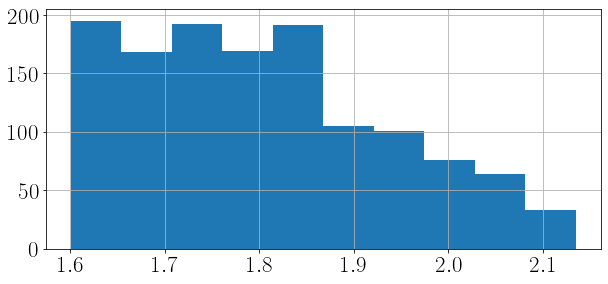

In [218]:
np.sqrt(((epgExpInb[FT&outCircle&circle].GcX - circleCenterX)**2 + (epgExpInb[FT&outCircle&circle].GcY - circleCenterY)**2)).hist()

In [269]:
circleCenterX = -9.89
circleCenterY = -5.327
circleRadius = 1.78
FT = (epgExpInb.Gsector>7) 
for i in range(0, 1):
    print(circleCenterX, circleCenterY, circleRadius)
    circle = (epgExpInb.GcX - circleCenterX)**2 + (epgExpInb.GcY - circleCenterY)**2 < circleRadius**2
    circleCenterX = epgExpInb.loc[FT & circle].GcX.mean()
    circleCenterY = epgExpInb.loc[FT & circle].GcY.mean()
    outCircle = (epgExpInb.GcX - circleCenterX)**2 + (epgExpInb.GcY - circleCenterY)**2 > (0.9*circleRadius)**2
    circleRadius = 1.1*np.sqrt(((epgExpInb[FT&outCircle&circle].GcX - circleCenterX)**2 + (epgExpInb[FT&outCircle&circle].GcY - circleCenterY)**2).min())
circleRadius = np.sqrt(((epgExpInb[FT&outCircle&circle].GcX - circleCenterX)**2 + (epgExpInb[FT&outCircle&circle].GcY - circleCenterY)**2).min())
print(circleCenterX, circleCenterY, circleRadius)
circle = (epgExpInb.GcX - circleCenterX)**2 + (epgExpInb.GcY - circleCenterY)**2 < circleRadius**2


-9.89 -5.327 1.78
-9.613680259895466 -5.0992043988506435 1.6022667212882065


In [273]:
circleCenterX1 = -8.419
circleCenterY1 = 9.889
circleRadius1 = 1.6

In [270]:
circleCenterX2 = -9.89
circleCenterY2 = -5.327
circleRadius2 = 1.6

In [311]:
circleCenterX3 = -6.15
circleCenterY3 = -13
circleRadius3 = 2.3

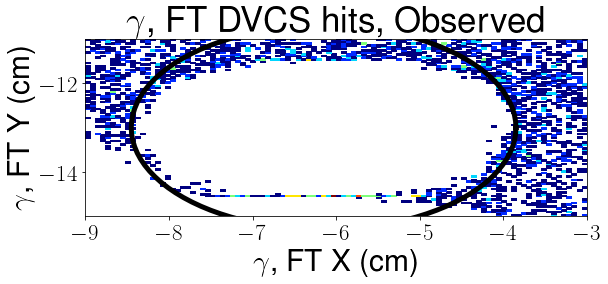

In [312]:
r = circleRadius3
theta = np.linspace(0, 2*np.pi, 101)
plt.plot(r*np.cos(theta) + circleCenterX3, r*np.sin(theta) + circleCenterY3, color = 'k', linewidth = 5)

plt.hist2d(epgExpInb.loc[(epgExpInb.Gsector>7)].GcX, epgExpInb.loc[(epgExpInb.Gsector>7) ].GcY, bins = [np.linspace(-9, -3, 101), np.linspace(-15, -11, 101)], cmin =1, cmap = copy(plt.cm.get_cmap("jet")))

plt.xlabel(r"$\gamma$"+", FT X (cm)")
plt.ylabel(r"$\gamma$"+", FT Y (cm)")
plt.title(r"$\gamma$"+", FT DVCS hits, Observed")
plt.show()

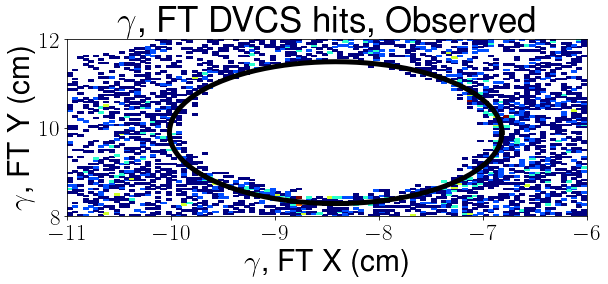

In [275]:
r = circleRadius1
theta = np.linspace(0, 2*np.pi, 101)
plt.plot(r*np.cos(theta) + circleCenterX1, r*np.sin(theta) + circleCenterY1, color = 'k', linewidth = 5)

plt.hist2d(epgExpInb.loc[(epgExpInb.Gsector>7)].GcX, epgExpInb.loc[(epgExpInb.Gsector>7) ].GcY, bins = [np.linspace(-11, -6, 101), np.linspace(8, 12, 101)], cmin =1, cmap = copy(plt.cm.get_cmap("jet")))

plt.xlabel(r"$\gamma$"+", FT X (cm)")
plt.ylabel(r"$\gamma$"+", FT Y (cm)")
plt.title(r"$\gamma$"+", FT DVCS hits, Observed")
plt.show()

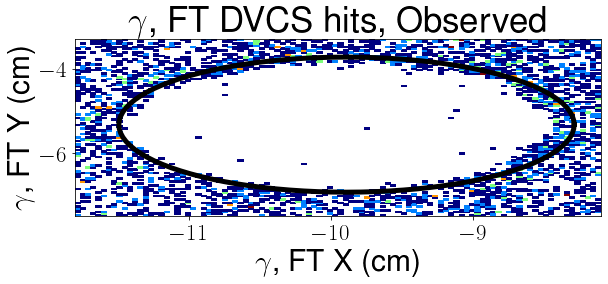

In [272]:
r = circleRadius2
theta = np.linspace(0, 2*np.pi, 101)
plt.plot(r*np.cos(theta) + circleCenterX2, r*np.sin(theta) + circleCenterY2, color = 'k', linewidth = 5)

plt.hist2d(epgExpInb.loc[(epgExpInb.Gsector>7)].GcX, epgExpInb.loc[(epgExpInb.Gsector>7) ].GcY, bins = [np.linspace(-11.8, -8.1, 101), np.linspace(-7.5, -3.3, 101)], cmin =1, cmap = copy(plt.cm.get_cmap("jet")))

plt.xlabel(r"$\gamma$"+", FT X (cm)")
plt.ylabel(r"$\gamma$"+", FT Y (cm)")
plt.title(r"$\gamma$"+", FT DVCS hits, Observed")
plt.show()

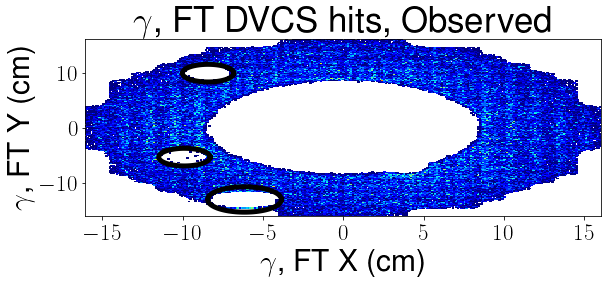

In [315]:
plt.hist2d(epgExpInb.loc[epgExpInb.Gsector>7].GcX, epgExpInb.loc[epgExpInb.Gsector>7].GcY, bins = 301, cmin =1, cmap = copy(plt.cm.get_cmap("jet")))
plt.plot(circleRadius1*np.cos(theta) + circleCenterX1, circleRadius1*np.sin(theta) + circleCenterY1, color = 'k', linewidth = 5)
plt.plot(circleRadius2*np.cos(theta) + circleCenterX2, circleRadius2*np.sin(theta) + circleCenterY2, color = 'k', linewidth = 5)
plt.plot(circleRadius3*np.cos(theta) + circleCenterX3, circleRadius3*np.sin(theta) + circleCenterY3, color = 'k', linewidth = 5)
plt.xlabel(r"$\gamma$"+", FT X (cm)")
plt.ylabel(r"$\gamma$"+", FT Y (cm)")
plt.title(r"$\gamma$"+", FT DVCS hits, Observed")
plt.show()

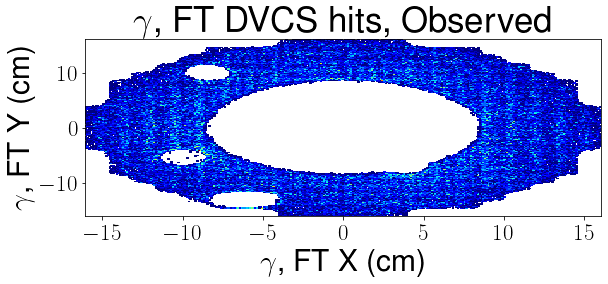

In [88]:
plt.hist2d(epgExpInb.loc[epgExpInb.Gsector>7].GcX, epgExpInb.loc[epgExpInb.Gsector>7].GcY, bins = 301, cmin =1, cmap = copy(plt.cm.get_cmap("jet")))
plt.xlabel(r"$\gamma$"+", FT X (cm)")
plt.ylabel(r"$\gamma$"+", FT Y (cm)")
plt.title(r"$\gamma$"+", FT DVCS hits, Observed")
plt.show()

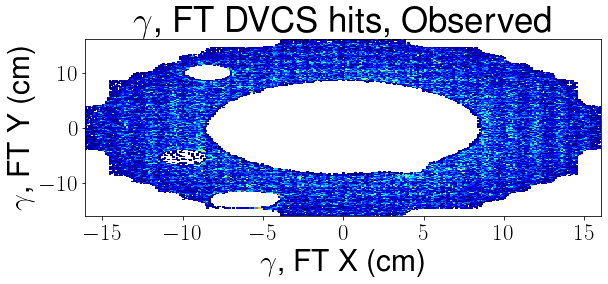

In [90]:
plt.hist2d(epgExpOutb.loc[epgExpOutb.Gsector>7].GcX, epgExpOutb.loc[epgExpOutb.Gsector>7].GcY, bins = 301, cmin =1, cmap = copy(plt.cm.get_cmap("jet")))
plt.xlabel(r"$\gamma$"+", FT X (cm)")
plt.ylabel(r"$\gamma$"+", FT Y (cm)")
plt.title(r"$\gamma$"+", FT DVCS hits, Observed")
plt.show()

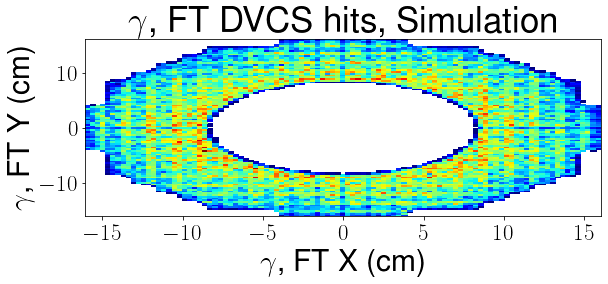

In [59]:
plt.hist2d(dvcsSimInb.loc[dvcsSimInb.Gsector>7].GcX, dvcsSimInb.loc[dvcsSimInb.Gsector>7].GcY, bins = 101, cmin =1, cmap = copy(plt.cm.get_cmap("jet")))
plt.xlabel(r"$\gamma$"+", FT X (cm)")
plt.ylabel(r"$\gamma$"+", FT Y (cm)")
plt.title(r"$\gamma$"+", FT DVCS hits, Simulation")
plt.show()

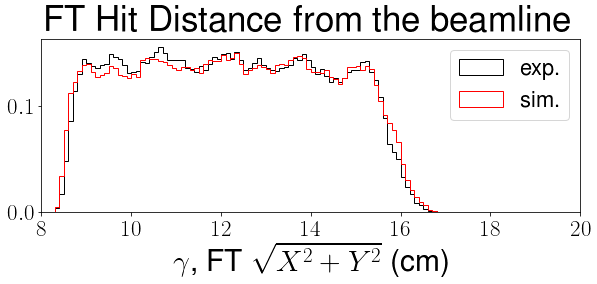

In [60]:
plt.hist(np.sqrt(epgExpInb.loc[epgExpInb.Gsector>7].GcY**2 + epgExpInb.loc[epgExpInb.Gsector>7].GcX**2), bins = np.linspace(7, 17, 101), density = True, histtype = 'step', color = 'k', label = 'exp.')
plt.hist(np.sqrt(dvcsSimInb.loc[dvcsSimInb.Gsector>7].GcY**2 + dvcsSimInb.loc[dvcsSimInb.Gsector>7].GcX**2), bins = np.linspace(7, 17, 101), density = True, histtype = 'step', color = 'r', label = 'sim.')
plt.legend(loc = 'upper right')
plt.xlim([8, 20])
plt.title("FT Hit Distance from the beamline")
plt.xlabel(r"$\gamma$"+", FT "+r"$\sqrt{X^2+Y^2}$"+" (cm)")
plt.show()

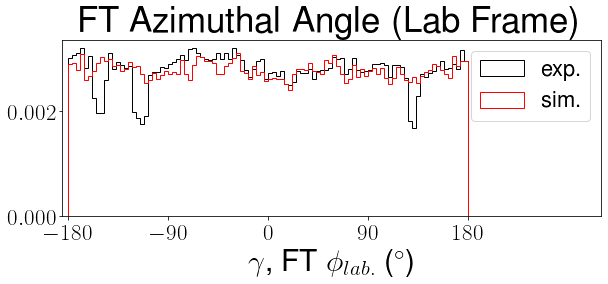

In [61]:
plt.hist(np.degrees(np.arctan2(epgExpInb.loc[epgExpInb.Gsector>7].GcY, epgExpInb.loc[epgExpInb.Gsector>7].GcX)), bins = np.linspace(-180, 180, 101), density = True, histtype = 'step', color = 'k', label = 'exp.')
plt.hist(np.degrees(np.arctan2(dvcsSimInb.loc[dvcsSimInb.Gsector>7].GcY, dvcsSimInb.loc[dvcsSimInb.Gsector>7].GcX)), bins = np.linspace(-180, 180, 101), density = True, histtype = 'step', color = 'r', label = 'sim.')
plt.legend(loc = 'upper right')
plt.xlim([-185, 300])
plt.xticks([-180, -90, 0, 90, 180])
plt.title("FT Azimuthal Angle (Lab Frame)")
plt.xlabel(r"$\gamma$"+", FT "+r"$\phi_{lab.}$"+" ("+degree+")")
plt.show()

<AxesSubplot:>

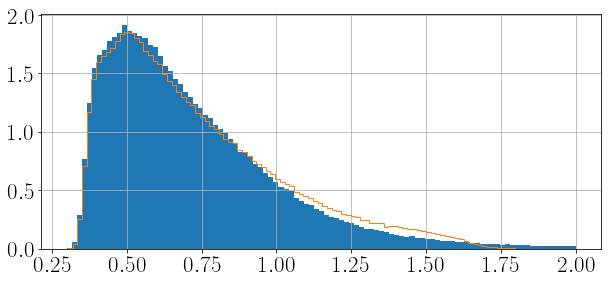

In [62]:
epgExpInb.Pp.hist(bins = 101, density = True)
dvcsSimInb.Pp.hist(bins = 101, density = True, histtype = 'step')

<AxesSubplot:>

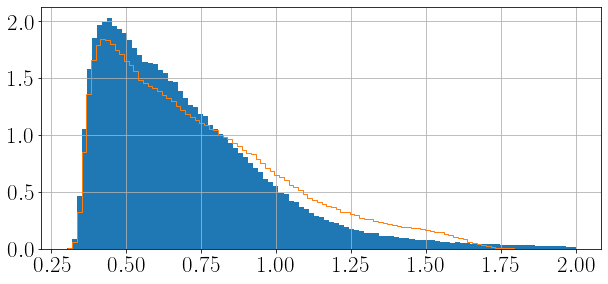

In [63]:
epgExpOutb.Pp.hist(bins = 101, density = True)
dvcsSimOutb.Pp.hist(bins = 101, density = True, histtype = 'step')

In [10]:
parent_exp = "/Volumes/Extreme SSD/Feb2022/convPkl_extended/outb/exp/"

exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")

In [13]:
epgExpOutb = copy(exp_1g_corr)
epgExpOutbCDFT = epgExpOutb.loc[exp_1g_corr.config == 3]
epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]

In [14]:
epgExp = pd.concat([epgExpInb, epgExpOutb])

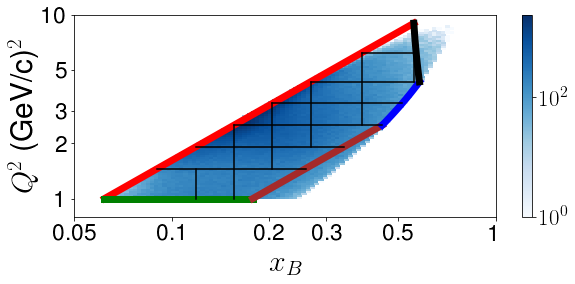

In [15]:
plt.rcParams["figure.figsize"] = (9, 4.5)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30

cmap = copy(plt.cm.get_cmap("Blues"))


# plt.hist2d(epgExpInb.loc[epgExpInb.tmin2>0.3].xB, epgExpInb.loc[epgExpInb.tmin2>0.3].Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 10, 101)], cmin = 1)
# plt.hist2d(np.log10(epgExpInbFD.xB), np.log10(epgExpInbFD.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.95, 101)], cmin = 1, cmap = cmap)
# plt.hist2d(np.log10(epgExpInbCD.xB), np.log10(epgExpInbCD.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 1, 101)], cmin = 1, cmap = cmap)
# plt.hist2d(np.log10(epgExpInbCDFT.xB), np.log10(epgExpInbCDFT.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.95, 101)], cmin = 1, cmap = cmap)
h = plt.hist2d(np.log10(epgExp.xB), np.log10(epgExp.Q2), bins = [np.linspace(np.log10(0.05), 0, 101), np.linspace(-0.1, 1, 101)], cmin = 1, cmap = cmap, norm=LogNorm())
plt.colorbar(h[3])
# plt.hist2d(np.log10(epgExpInb61.xB), np.log10(epgExpInb61.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.99, 101)], cmin = 1, cmap = cmap)

k= 2*M*(np.sqrt(0.8**2+M**2)-M)
# plt.axvline(0.5)
# plt.axvline(0.4)
# plt.axvline(0.3)
# plt.axvline(0.2)
# plt.axvline(0.1)
x1 = 1/2/M/8.604
# plt.axvline(np.log10(x1))
x2 = 1/2/M/3
# plt.axvline(np.log10(x2))
x3 = 1-(4-M**2)/2/M/3
# plt.axvline(np.log10(x3))
x4 = 2*(1-np.sqrt((k-M**4+4*M**2)/k))/(M**4/k - 4*M**2/k)
# plt.axvline(np.log10(x4))
x5 = (-1+np.sqrt(1+4*M**2/k*(1+M/8.604/2)))/2/M**2*k
# plt.axvline(np.log10(x5))
y1 = 1
y2 = 1.456
y3 = 6*M*x3
y4 = (4-M**2)*x4/(1-x4)
y5 = 2*M*8.604*x5

l1 = np.linspace(x1, x5, 101)
plt.plot(np.log10(l1), np.log10(l1*2*M*(10.604-2)), color = 'r', linewidth = 7)
l2 = np.linspace(x1, x2, 101)
plt.plot(np.log10(l2), np.log10(1+l2*0), color = 'g', linewidth = 7)
l3 = np.linspace(x2, x3, 101)
plt.plot(np.log10(l3), np.log10(l3*2*M*(3)), color = 'brown', linewidth = 7)
k= 2*M*(np.sqrt(0.8**2+M**2)-M)
l4 = np.linspace(x3, x4, 101)
plt.plot(np.log10(l4), np.log10((4 - M*M)*l4/(1 - l4)), color = 'b', linewidth = 7)
l5 = np.linspace(x5, x4, 101)
plt.plot(np.log10(l5), np.log10(M*M*l5/(M*M*l5*l5/k-(1-l5))), color = 'k', linewidth = 7)

# c11 = np.sqrt(np.sqrt(y1*y3)*y1)/2/M/8.6048
# c12 = np.sqrt(np.sqrt(y1*y3)*y1)/2/M/3

c0 = y2/2/M/8.604
d0 = y2/2/M/3
c1 = np.sqrt(y2*y3)/2/M/8.604
d1 = np.sqrt(y2*y3)/2/M/3
plt.plot(np.linspace(np.log10(c1),np.log10(c1), 101), np.linspace(np.log10(y1), np.log10(y2), 101), color='k')
c2 = y3/2/M/8.604
d2 = x3
plt.plot(np.linspace(np.log10(c2),np.log10(c2), 101), np.linspace(np.log10(y1), np.log10(y3), 101), color='k')
c3 = np.sqrt(y3*y4)/2/M/8.604
d3 = 1/(1+(4-M*M)/np.sqrt(y3*y4))
plt.plot(np.linspace(np.log10(c3),np.log10(c3), 101), np.linspace(np.log10(y2), np.log10(np.sqrt(y3*y4)), 101), color='k')
c4 = y4/2/M/8.604
d4 = x5
plt.plot(np.linspace(np.log10(c4),np.log10(c4), 101), np.linspace(np.log10(np.sqrt(y2*y3)), np.log10(y4), 101), color='k')
c5 = np.sqrt(y4*y5)/2/M/8.604
d5 = x5
plt.plot(np.linspace(np.log10(c5),np.log10(c5), 101), np.linspace(np.log10(y3), np.log10(np.sqrt(y4*y5)), 101), color='k')
plt.plot(np.linspace(np.log10(x5),np.log10(x5), 101), np.linspace(np.log10(y4), np.log10(y5), 101), color='k')

plt.plot(np.linspace(np.log10(c0), np.log10(d0), 101), np.linspace(np.log10(y2), np.log10(y2), 101), color='k')
plt.plot(np.linspace(np.log10(c1), np.log10(d1), 101), np.linspace(np.log10(np.sqrt(y2*y3)), np.log10(np.sqrt(y2*y3)), 101), color='k')
plt.plot(np.linspace(np.log10(c2), np.log10(d2), 101), np.linspace(np.log10(y3), np.log10(y3), 101), color='k')
plt.plot(np.linspace(np.log10(c3), np.log10(d3), 101), np.linspace(np.log10(np.sqrt(y3*y4)), np.log10(np.sqrt(y3*y4)), 101), color='k')
plt.plot(np.linspace(np.log10(c4), np.log10(d4), 101), np.linspace(np.log10(y4), np.log10(y4), 101), color='k')
plt.plot(np.linspace(np.log10(c5), np.log10(d5), 101), np.linspace(np.log10(np.sqrt(y4*y5)), np.log10(np.sqrt(y4*y5)), 101), color='k')

plt.ylim([-0.1, 1])
plt.xlim([-1.25, -0.2])
plt.yticks([0, np.log10(2), np.log10(3), np.log10(5), np.log10(10)], [1, 2, 3, 5, 10] )
plt.xticks([np.log10(0.05), -1, np.log10(0.2), np.log10(0.3), np.log10(0.5), 0], [0.05, 0.1, 0.2, 0.3, 0.5, 1])

plt.xlabel(r"$x_B$")
plt.ylabel(r"$Q^2$"+" "+ GeVc2)
plt.show()

In [16]:
tbin0 = 0.088#2*M*(np.sqrt(0.3**2+M**2)-M)
tbin1 = 0.168#2*M*(np.sqrt(0.42**2+M**2)-M)
tbin2 = 0.234#2*M*(np.sqrt(0.5**2+M**2)-M)
tbin3 = 0.414#2*M*(np.sqrt(0.68**2+M**2)-M)
tbin4 = 0.553#2*M*(np.sqrt(0.8**2+M**2)-M)

In [17]:
print(tbin0, tbin1, tbin2, tbin3, tbin4)

0.088 0.168 0.234 0.414 0.553


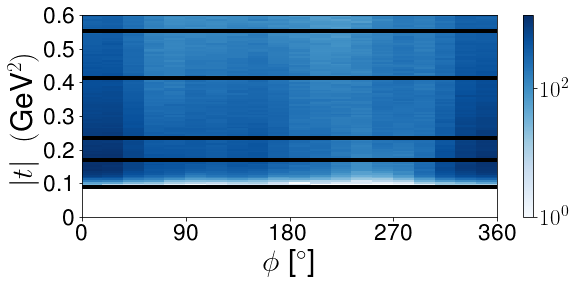

In [18]:
h = plt.hist2d(epgExp.phi1, (epgExp.t1), bins = [np.linspace(0, 360, 21), np.linspace(0.05, 0.6, 101)], cmin = 1, cmap = cmap, norm = LogNorm())
plt.colorbar(h[3])
plt.ylabel(r"$|t|~~ ($"+GeV2+r"$)$")
plt.xlabel(r"$\phi$" +" ["+degree+"]")
plt.axhline(tbin0, color = 'k', linewidth = 4)
plt.axhline(tbin1, color = 'k', linewidth = 4)
plt.axhline(tbin2, color = 'k', linewidth = 4)
plt.axhline(tbin3, color = 'k', linewidth = 4)
plt.axhline(tbin4, color = 'k', linewidth = 4)
plt.xticks([0, 90, 180, 270, 360], [0, 90, 180, 270, 360])
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
plt.show()

In [19]:
# tedges = [10**(-0.9), 10**(-0.725), 10**(-0.55), 10**(-0.375), 10**(-0.2)]
tedges = [tbin0,  tbin1, tbin2, tbin3, tbin4]
def tbinning(df):
#     return df[(df.t1>=10**(-0.9))&(df.t1<10**(-0.725))], df[(df.t1>=10**(-0.725))&(df.t1<10**(-0.55))], df[(df.t1>=10**(-0.55))&(df.t1<10**(-0.375))], df[(df.t1>=10**(-0.375))&(df.t1<=10**(-0.2))]
    return df[(df.t1>=tedges[0])&(df.t1<tedges[1])], df[(df.t1>=tedges[1])&(df.t1<tedges[2])], df[(df.t1>=tedges[2])&(df.t1<tedges[3])], df[(df.t1>=tedges[3])&(df.t1<=tedges[4])]

In [20]:
epgExpInb0 = epgExpInb.loc[(epgExpInb.Q2>y1)&(epgExpInb.Q2<y2)]
epgExpInb00 = epgExpInb0.loc[(epgExpInb0.xB<c1)&(epgExpInb0.Q2<=2*M*(10.604-2)*epgExpInb0.xB)]
epgExpInb01 = epgExpInb0.loc[(epgExpInb0.xB>=c1)&(epgExpInb0.xB<c2)]
epgExpInb02 = epgExpInb0.loc[(epgExpInb0.xB>=c2)&(epgExpInb0.Q2>=2*M*3*epgExpInb0.xB)]
epgExpInb000, epgExpInb001, epgExpInb002, epgExpInb003 = tbinning(epgExpInb00)
epgExpInb010, epgExpInb011, epgExpInb012, epgExpInb013 = tbinning(epgExpInb01)
epgExpInb020, epgExpInb021, epgExpInb022, epgExpInb023 = tbinning(epgExpInb02)

epgExpInb1 = epgExpInb.loc[(epgExpInb.Q2>y2)&(epgExpInb.Q2<np.sqrt(y2*y3))]
epgExpInb10 = epgExpInb1.loc[(epgExpInb1.xB<c2)&(epgExpInb1.Q2<=2*M*(10.604-2)*epgExpInb1.xB)]
epgExpInb11 = epgExpInb1.loc[(epgExpInb1.xB>=c2)&(epgExpInb1.xB<c3)]
epgExpInb12 = epgExpInb1.loc[(epgExpInb1.xB>=c3)&(epgExpInb1.Q2>=2*M*3*epgExpInb1.xB)]
epgExpInb100, epgExpInb101, epgExpInb102, epgExpInb103 = tbinning(epgExpInb10)
epgExpInb110, epgExpInb111, epgExpInb112, epgExpInb113 = tbinning(epgExpInb11)
epgExpInb120, epgExpInb121, epgExpInb122, epgExpInb123 = tbinning(epgExpInb12)

epgExpInb2 = epgExpInb.loc[(epgExpInb.Q2>np.sqrt(y2*y3))&(epgExpInb.Q2<y3)]
epgExpInb20 = epgExpInb2.loc[(epgExpInb2.xB<c2)&(epgExpInb2.Q2<2*M*(10.604-2)*epgExpInb2.xB)]
epgExpInb21 = epgExpInb2.loc[(epgExpInb2.xB>=c2)&(epgExpInb2.xB<c3)]
epgExpInb22 = epgExpInb2.loc[(epgExpInb2.xB>=c3)&(epgExpInb2.xB<c4)]
epgExpInb23 = epgExpInb2.loc[(epgExpInb2.xB>=c4)&(epgExpInb2.Q2>=2*M*3*epgExpInb2.xB)]
epgExpInb200, epgExpInb201, epgExpInb202, epgExpInb203 = tbinning(epgExpInb20)
epgExpInb210, epgExpInb211, epgExpInb212, epgExpInb213 = tbinning(epgExpInb21)
epgExpInb220, epgExpInb221, epgExpInb222, epgExpInb223 = tbinning(epgExpInb22)
epgExpInb230, epgExpInb231, epgExpInb232, epgExpInb233 = tbinning(epgExpInb23)

epgExpInb3 = epgExpInb.loc[(epgExpInb.Q2>y3)&(epgExpInb.Q2<np.sqrt(y3*y4))]
epgExpInb30 = epgExpInb3.loc[(epgExpInb3.xB<c3)&(epgExpInb3.Q2<2*M*(10.604-2)*epgExpInb3.xB)]
epgExpInb31 = epgExpInb3.loc[(epgExpInb3.xB>=c3)&(epgExpInb3.xB<c4)]
epgExpInb32 = epgExpInb3.loc[(epgExpInb3.xB>=c4)&(epgExpInb3.xB<c5)]
epgExpInb33 = epgExpInb3.loc[(epgExpInb3.xB>=c5)&(epgExpInb3.Q2>=(4 - M*M)*epgExpInb3.xB/(1 - epgExpInb3.xB))]
epgExpInb300, epgExpInb301, epgExpInb302, epgExpInb303 = tbinning(epgExpInb30)
epgExpInb310, epgExpInb311, epgExpInb312, epgExpInb313 = tbinning(epgExpInb31)
epgExpInb320, epgExpInb321, epgExpInb322, epgExpInb323 = tbinning(epgExpInb32)
epgExpInb330, epgExpInb331, epgExpInb332, epgExpInb333 = tbinning(epgExpInb33)

epgExpInb4 = epgExpInb.loc[(epgExpInb.Q2>np.sqrt(y3*y4))&(epgExpInb.Q2<y4)]
epgExpInb40 = epgExpInb4.loc[(epgExpInb4.xB<c4)&(epgExpInb4.Q2<2*M*(10.604-2)*epgExpInb4.xB)]
epgExpInb41 = epgExpInb4.loc[(epgExpInb4.xB>=c4)&(epgExpInb4.xB<c5)]
epgExpInb42 = epgExpInb4.loc[(epgExpInb4.xB>=c5)&(epgExpInb4.Q2>=(4 - M*M)*epgExpInb4.xB/(1 - epgExpInb4.xB))]
epgExpInb400, epgExpInb401, epgExpInb402, epgExpInb403 = tbinning(epgExpInb40)
epgExpInb410, epgExpInb411, epgExpInb412, epgExpInb413 = tbinning(epgExpInb41)
epgExpInb420, epgExpInb421, epgExpInb422, epgExpInb423 = tbinning(epgExpInb41)

epgExpInb5 = epgExpInb.loc[(epgExpInb.Q2>y4)&(epgExpInb.Q2<np.sqrt(y4*y5))]
epgExpInb50 = epgExpInb5.loc[(epgExpInb5.xB<c5)&(epgExpInb5.Q2<2*M*(10.604-2)*epgExpInb5.xB)]
epgExpInb51 = epgExpInb5.loc[(epgExpInb5.xB>=c5)&(epgExpInb5.xB<x5)]
epgExpInb500, epgExpInb501, epgExpInb502, epgExpInb503 = tbinning(epgExpInb50)
epgExpInb510, epgExpInb511, epgExpInb512, epgExpInb513 = tbinning(epgExpInb51)

epgExpInb6 = epgExpInb.loc[(epgExpInb.Q2>np.sqrt(y4*y5))&(epgExpInb.Q2<y5)]
epgExpInb60 = epgExpInb6.loc[(epgExpInb6.xB<x5)&(epgExpInb6.Q2<2*M*(10.604-2)*epgExpInb6.xB)]
epgExpInb600, epgExpInb601, epgExpInb602, epgExpInb603 = tbinning(epgExpInb60)

In [21]:
print(len(epgExpInb000), len(epgExpInb001), len(epgExpInb002), len(epgExpInb003))
print(len(epgExpInb010), len(epgExpInb011), len(epgExpInb012), len(epgExpInb013))
print(len(epgExpInb020), len(epgExpInb021), len(epgExpInb022), len(epgExpInb023))
print(len(epgExpInb100), len(epgExpInb101), len(epgExpInb102), len(epgExpInb103))
print(len(epgExpInb110), len(epgExpInb111), len(epgExpInb112), len(epgExpInb113))
print(len(epgExpInb120), len(epgExpInb121), len(epgExpInb122), len(epgExpInb123))
print(len(epgExpInb200), len(epgExpInb201), len(epgExpInb202), len(epgExpInb203))
print(len(epgExpInb210), len(epgExpInb211), len(epgExpInb212), len(epgExpInb213))
print(len(epgExpInb220), len(epgExpInb221), len(epgExpInb222), len(epgExpInb223))
print(len(epgExpInb230), len(epgExpInb231), len(epgExpInb232), len(epgExpInb233))
print(len(epgExpInb300), len(epgExpInb301), len(epgExpInb302), len(epgExpInb303))
print(len(epgExpInb310), len(epgExpInb311), len(epgExpInb312), len(epgExpInb313))
print(len(epgExpInb320), len(epgExpInb321), len(epgExpInb322), len(epgExpInb323))
print(len(epgExpInb330), len(epgExpInb331), len(epgExpInb332), len(epgExpInb333))
print(len(epgExpInb400), len(epgExpInb401), len(epgExpInb402), len(epgExpInb403))
print(len(epgExpInb410), len(epgExpInb411), len(epgExpInb412), len(epgExpInb413))
print(len(epgExpInb420), len(epgExpInb421), len(epgExpInb422), len(epgExpInb423))
print(len(epgExpInb500), len(epgExpInb501), len(epgExpInb502), len(epgExpInb503))
print(len(epgExpInb510), len(epgExpInb511), len(epgExpInb512), len(epgExpInb513))
print(len(epgExpInb600), len(epgExpInb601), len(epgExpInb602), len(epgExpInb603))

167 186 331 167
66 63 88 48
29 22 40 15
3369 2726 3642 1838
1403 1323 1549 733
741 1523 2431 754
6383 3893 4083 2260
5786 6647 9237 5038
2044 3705 5439 2063
217 1798 6042 2529
7206 10742 16299 4866
2076 5316 11794 5685
171 2049 7708 3370
0 68 1953 1600
1119 4093 11069 4493
34 1396 7292 3967
34 1396 7292 3967
0 383 3450 2295
0 30 1862 2235
0 0 88 184


In [76]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/convPkl_extended/inb/dvcs/"
parent_bhMC = "/Volumes/Extreme SSD/Feb2022/convPkl_extended/inb/bh/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/convPkl_extended/inb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/convPkl_extended/inb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/convPkl_extended/inb/exp/"

#dvcs Rec
df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
#bkg1g Rec
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
#bkg2g Rec
df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
#bkg2g Exp
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [77]:
dvcsSimInb = df_3987_corr

In [24]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/convPkl_extended/outb/dvcs/"
parent_bhMC = "/Volumes/Extreme SSD/Feb2022/convPkl_extended/outb/bh/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Feb2022/convPkl_extended/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/convPkl_extended/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/convPkl_extended/outb/exp/"

#dvcs Rec
df_4240_corr = pd.read_pickle(parent_MC + "4240.pkl")
#bkg1g Rec
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
#bkg2g Rec
df_4243_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")
#bkg2g Exp
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [25]:
dvcsSimOutb = df_4240_corr

In [26]:
dvcsSim = pd.concat([dvcsSimInb, dvcsSimOutb])

In [78]:
pi0ExpInb = copy(exp_2g_corr)
dvcsSimInb = df_3987_corr#pd.concat([df_3987_corr, df_4124_corr, df_4139_corr, df_4181_corr, df_4182_corr])
bkgSimInb = df_4076_1g_corr#pd.concat([df_4076_1g_corr, df_4202_1g_corr, df_4209_1g_corr])
pi0SimInb = df_4076_2g_corr#pd.concat([df_4076_2g_corr, df_4202_2g_corr, df_4209_2g_corr])

In [79]:
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[(pi0ExpInb.config == 3)]
pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.config == 3)]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[(pi0ExpInb.config == 2)]
pi0SimInbCD = pi0SimInb.loc[(pi0SimInb.config == 2)]

epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[(pi0ExpInb.config == 1)]
pi0SimInbFD = pi0SimInb.loc[(pi0SimInb.config == 1)]

In [80]:
contInbCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
contInbFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contInbCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)
contInb = len(pi0ExpInb)*len(bkgSimInb)/len(pi0SimInb)/len(epgExpInb)

In [81]:
print(len(pi0ExpInbCD[(pi0ExpInbCD.Pp<0.8)&(pi0ExpInbCD.Gp>3)])*len(bkgSimInbCD[(bkgSimInbCD.Pp < 0.8)&(bkgSimInbCD.Gp > 3)])/len(pi0SimInbCD[(pi0SimInbCD.Pp < 0.8)&(pi0SimInbCD.Gp > 3)])/len(epgExpInbCD[(epgExpInbCD.Pp <0.8) & (epgExpInbCD.Gp > 3)]))

0.11354970785696368


In [43]:
print(contInbFD, contInbCD, contInbCDFT)

0.45705523105622 0.583552293985265 0.007422790864459759


In [49]:
print(len(pi0ExpInbCD),len(bkgSimInbCD),len(pi0SimInbCD),len(epgExpInbCD))

169329 90407 193604 135500


In [52]:
print(len(pi0ExpInbCD[pi0ExpInbCD.Pp<0.8]),len(bkgSimInbCD[bkgSimInbCD.Pp < 0.8]),len(pi0SimInbCD[pi0SimInbCD.Pp < 0.8]),len(epgExpInbCD[epgExpInbCD.Pp <0.8]))

99107 51919 108243 100736


In [68]:
print(len(pi0ExpInbCD[pi0ExpInbCD.Pp<0.8])*len(bkgSimInbCD[bkgSimInbCD.Pp < 0.8])/len(pi0SimInbCD[pi0SimInbCD.Pp < 0.8])/len(epgExpInbCD[epgExpInbCD.Pp <0.8]))

0.47189581596570895


<AxesSubplot:>

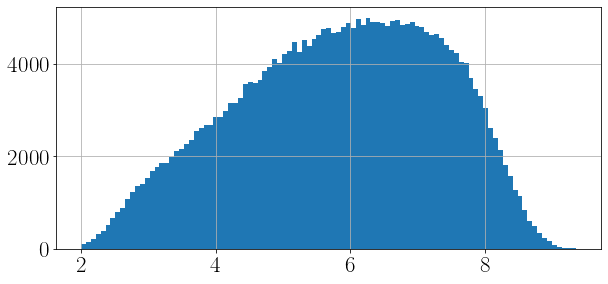

In [73]:
dvcsSimInbCD.Gp.hist(bins = 101)

coneAngle 31.80567504344705
reconGam 0.46652889288993626
coplanarity 3.6782102777951526
ME_epg 0.07720288953381382
MM2_epg -0.0008671832916390754
MM2_eg 0.9779881341163985
MM2_ep 0.008923374560151298
MPt 0.07209102000945747


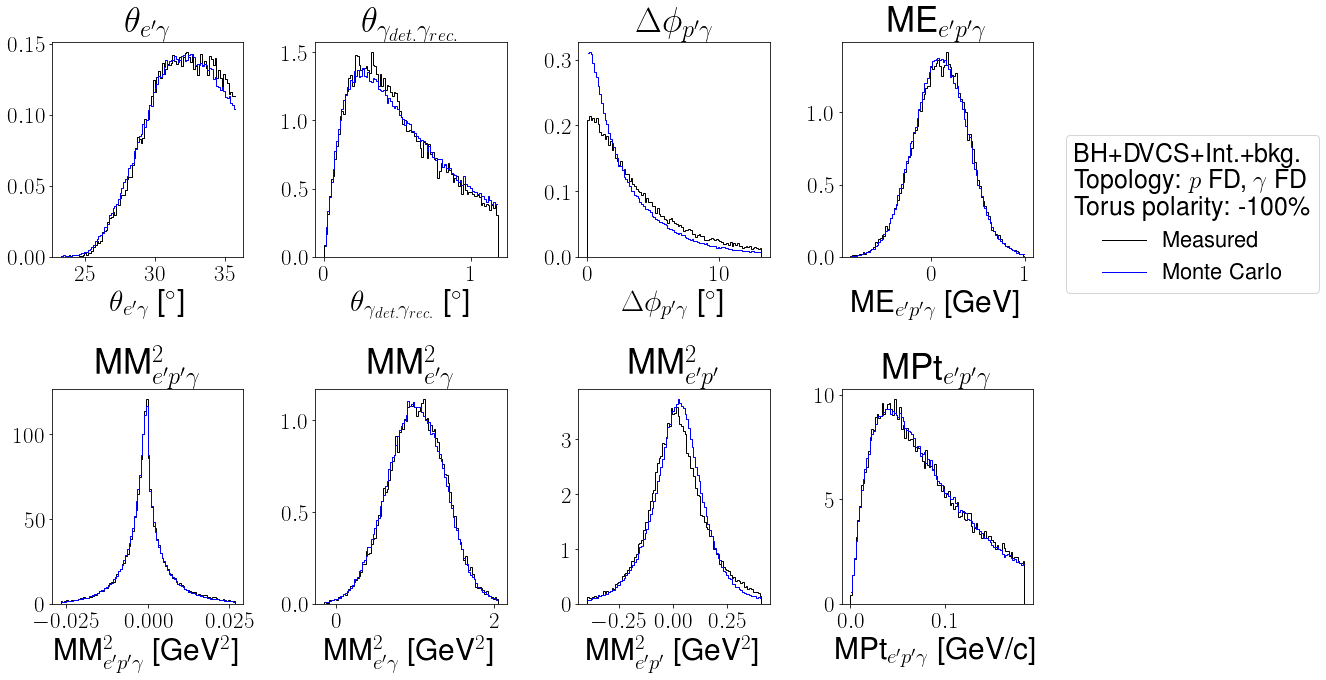

<Figure size 648x324 with 0 Axes>

In [82]:
# contInbFD = 0.4

df2 = bkgSimInbFD#smearingDVCS4(bkgSimInbFD, 0, 0.14, 0)
df1 = dvcsSimInbFD#smearingDVCS4(dvcsSimInbFD, 0, 0.14, 0)

varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))

for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(df1[varstoplot[ind]], bins, density = True)
        simDist = (1-contInbFD)*simDist_dvcs + contInbFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins))
        axs[yind, xind].set_title(title[ind])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

0.1589304046137167
coneAngle 23.012769532193506
reconGam 0.3275843820364595
coplanarity 2.1062220869427315
ME_epg 0.012230783608729643
MM2_epg -0.001522959286064484
MM2_eg 0.9032930904498013
MM2_ep 0.004896050223618113
MPt 0.050164549707887474


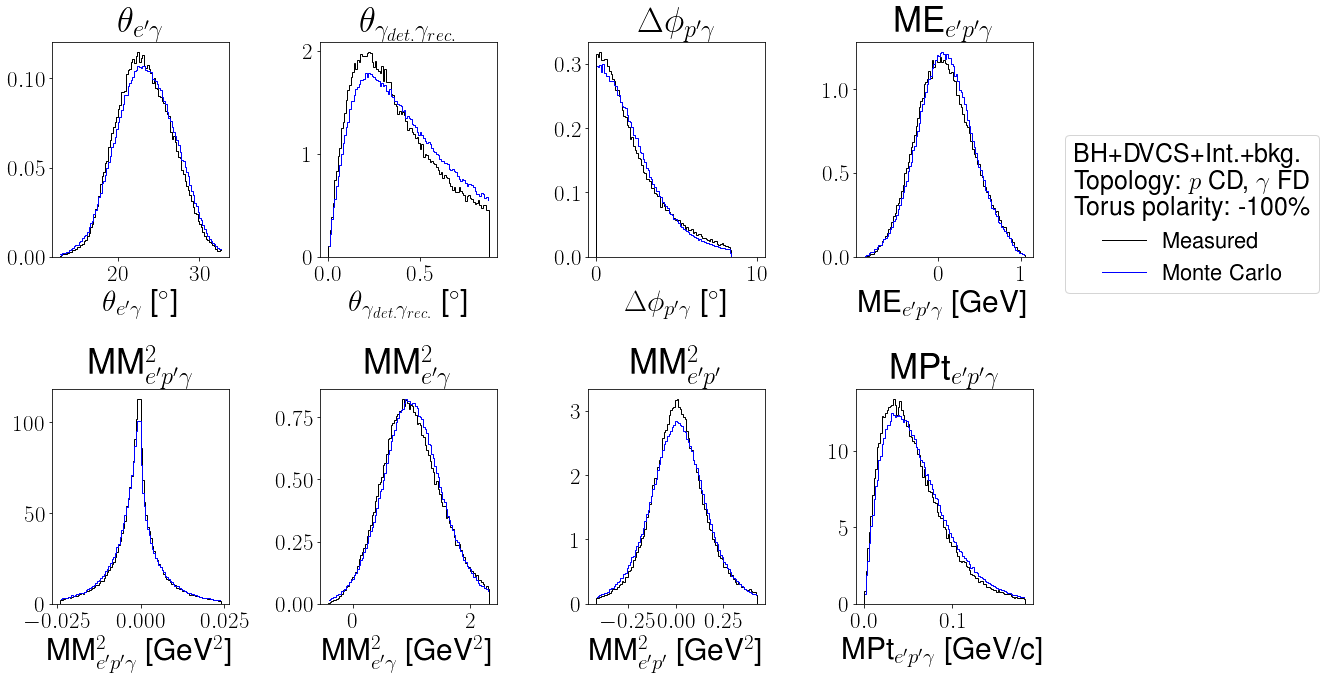

<Figure size 648x324 with 0 Axes>

In [83]:
gpmin = 3
gpmax = 10
contInbCD = len(pi0ExpInbCD.loc[(pi0ExpInbCD.Gp>gpmin)& (pi0ExpInbCD.Gp<gpmax)])*len(bkgSimInbCD.loc[(bkgSimInbCD.Gp>gpmin)& (bkgSimInbCD.Gp<gpmax)])/len(pi0SimInbCD.loc[(pi0SimInbCD.Gp>gpmin)& (pi0SimInbCD.Gp<gpmax)])/len(epgExpInbCD.loc[(epgExpInbCD.Gp>gpmin)& (epgExpInbCD.Gp<gpmax)])
print(contInbCD)
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.loc[(bkgSimInbCD.Gp>gpmin)& (bkgSimInbCD.Gp<gpmax),varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.loc[(dvcsSimInbCD.Gp>gpmin)& (dvcsSimInbCD.Gp<gpmax),varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contInbCD)*simDist_dvcs + contInbCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD.loc[(epgExpInbCD.Gp>gpmin)& (epgExpInbCD.Gp<gpmax),varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpInbCD.loc[(epgExpInbCD.Gp>gpmin)& (epgExpInbCD.Gp<gpmax),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

0.16249820034366952
coneAngle 23.052284491660338
reconGam 0.33313356710866504
coplanarity 2.139003065607629
ME_epg 0.020672726032027862
MM2_epg -0.0015661489255156368
MM2_eg 0.9157094215451599
MM2_ep 0.005402296666452951
MPt 0.05067229049777313


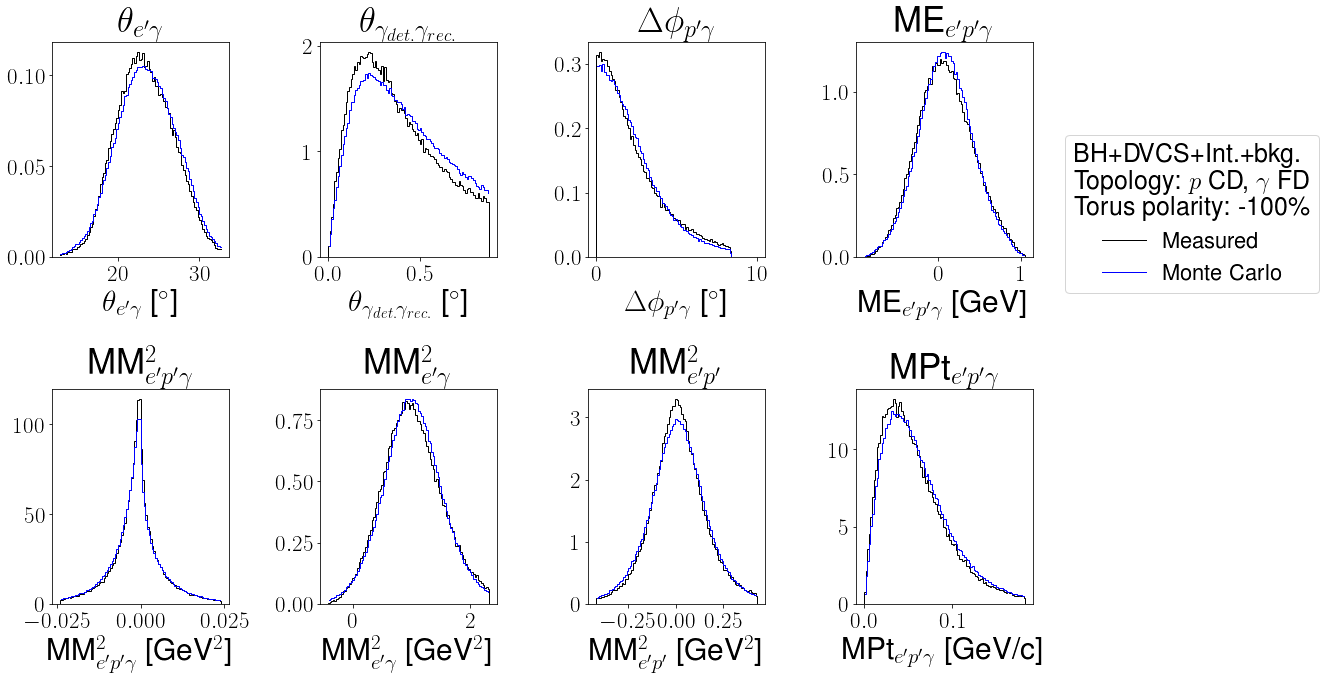

<Figure size 648x324 with 0 Axes>

In [86]:
Ppmin = 0.3
Ppmax = 2
contInbCD = len(pi0ExpInbCD.loc[(pi0ExpInbCD.Pp>Ppmin)& (pi0ExpInbCD.Pp<Ppmax)])*len(bkgSimInbCD.loc[(bkgSimInbCD.Pp>Ppmin)& (bkgSimInbCD.Pp<Ppmax)])/len(pi0SimInbCD.loc[(pi0SimInbCD.Pp>Ppmin)& (pi0SimInbCD.Pp<Ppmax)])/len(epgExpInbCD.loc[(epgExpInbCD.Pp>Ppmin)& (epgExpInbCD.Pp<Ppmax)])
print(contInbCD)

varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.loc[(bkgSimInbCD.Pp>Ppmin)& (bkgSimInbCD.Pp<Ppmax),varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.loc[(dvcsSimInbCD.Pp>Ppmin)& (dvcsSimInbCD.Pp<Ppmax),varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contInbCD)*simDist_dvcs + contInbCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD.loc[(epgExpInbCD.Pp>Ppmin)& (epgExpInbCD.Pp<Ppmax),varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpInbCD.loc[(epgExpInbCD.Pp>Ppmin)& (epgExpInbCD.Pp<Ppmax),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

coneAngle 21.106191701583466
reconGam 0.27369263535749433
coplanarity 1.9363933078169004
ME_epg -0.008683167105975288
MM2_epg -0.0017270324705251307
MM2_eg 0.8774157588013819
MM2_ep 0.019909253210666018
MPt 0.03550593331141652


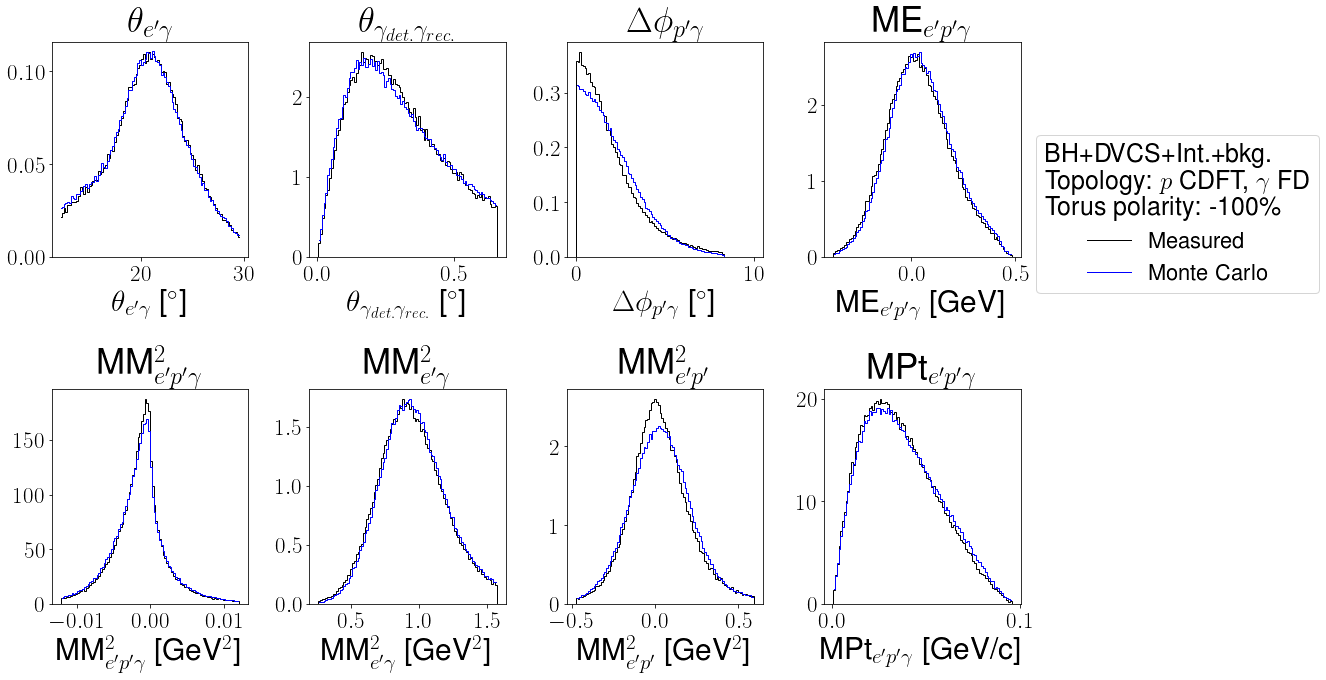

<Figure size 648x324 with 0 Axes>

In [85]:
Ppmin = 0.3
Ppmax = 2

varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.loc[(bkgSimInbCDFT.Pp>Ppmin)& (bkgSimInbCDFT.Pp<Ppmax),varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Pp>Ppmin)& (dvcsSimInbCDFT.Pp<Ppmax),varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
        simDist = (1-contInbCDFT)*simDist_dvcs + contInbCDFT*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCDFT.loc[(epgExpInbCDFT.Pp>Ppmin)& (epgExpInbCDFT.Pp<Ppmax),varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpInbCDFT.loc[(epgExpInbCDFT.Pp>Ppmin)& (epgExpInbCDFT.Pp<Ppmax),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CDFT/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CDFT, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

<AxesSubplot:>

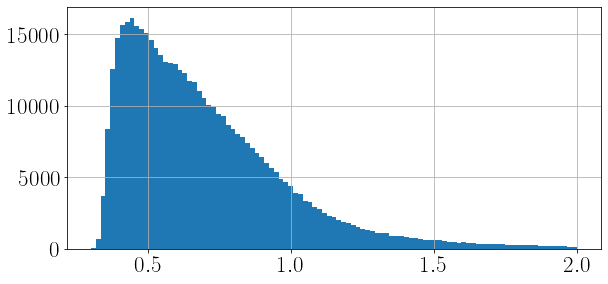

In [87]:
exp_1g_corr.Pp.hist(bins = 101)

<AxesSubplot:>

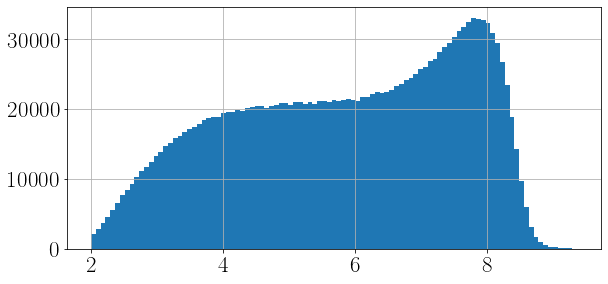

In [36]:
dvcsSim.Gp.hist(bins = 101)

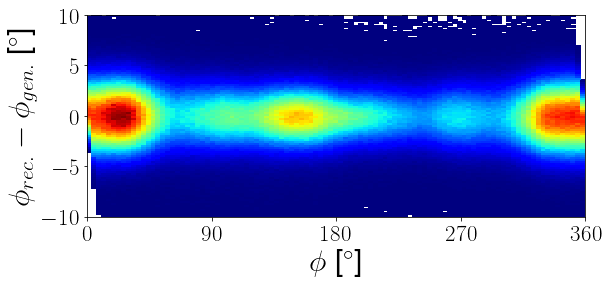

In [44]:
plt.hist2d(dvcsSim.Genphi2, (dvcsSim.phi1-dvcsSim.Genphi2), bins = [101, np.linspace(-10, 10, 101)], cmap = copy(plt.cm.get_cmap("jet")), cmin = 1)
plt.xlabel(r"$\phi$" + " ["+degree+"]")
plt.ylabel(r"$\phi_{rec.}-\phi_{gen.}$" + " ["+degree+"]")
plt.xlim([0, 360])
plt.xticks([0, 90, 180, 270, 360])

plt.show()

In [45]:
from scipy.stats import norm
from scipy.stats import cauchy
from scipy.stats import chi2

In [46]:
def normfit(args, x):
#     df = args
    loc, scale, amp = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return amp * rv.pdf(x)

In [47]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [48]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    hist = dist
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    unchist = np.sqrt(dist)
    chi2fit = np.sum((dist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [49]:
phimin = 0
phimax = 360
# df = dvcsSim.loc[(dvcsSim.phi1<phimax)&(dvcsSim.phi1>phimin)]
df = dvcsSim

pvalue_opt = 0
for i in range(0, 3):
    if i == 0:
        dist, bins = np.histogram(df.phi1 - df.Genphi2, bins = np.linspace(-6, 6, 21))
        params = [0, 2.5, 100000]
    else:
        dist, bins = np.histogram(df.phi1 - df.Genphi2, bins = np.linspace(-6, 6, 21))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, dist))
    params = res_lsq.x
    loc, scale, amp = params
    lb = norm.ppf(0.1, loc = loc, scale = scale)
    ub = norm.ppf(0.9, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 5137093.703130544 17
0.0 6990.935326679239 17
0.0 6990.929813468619 17


In [50]:
len(dvcsSim)

5577214

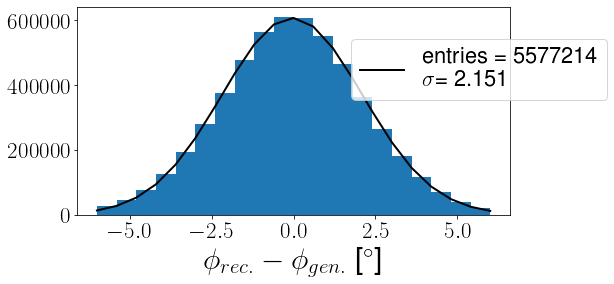

[-4.19850926e-02  2.15137813e+00  3.27168643e+06]


In [51]:
plt.hist(df.phi1-df.Genphi2, bins = np.linspace(-6, 6, 21))
plt.plot(np.linspace(-6, 6, 21), normfit(params, np.linspace(-6, 6, 21)), 'k-', lw=2, label='entries = {}\n'.format(len(dvcsSim))+r"$\sigma$="+" {:.3f}".format(params[1]))
# plt.plot(np.linspace(-10, 10, 101), cauchyfit(params, np.linspace(-10, 10, 101)), 'k-', lw=2, label='frozen pdf')
plt.xlabel(r"$\phi_{rec.}-\phi_{gen.}$" + " ["+degree+"]")
plt.legend(loc = 'upper right', bbox_to_anchor = [1.25, 0.9])
plt.tight_layout()
plt.show()
print(params)

In [53]:
Q2bin_i = [y1, y2, np.sqrt(y2*y3), y3, np.sqrt(y3*y4), y4, np.sqrt(y4*y5)]
Q2bin_f = [y2, np.sqrt(y2*y3), y3, np.sqrt(y3*y4), y4, np.sqrt(y4*y5), y5]
xBbin_i = {0:[[x1, c0], c1, c2], 1: [[c0, c1], c2, c3], 2: [[c1, c2], c2, c3, c4], 3: [[c2, c3], c3, c4, c5], 4: [[c3, c4], c4, c5], 5: [[c4, c5], c5], 6: [[c5, x5]]}
xBbin_f = {0: [c1, c2, [x2, d0]], 1: [c2, c3, [x2, d1]], 2: [c2, c3, c4, [d1, d2]], 3: [c3, c4, c5, [d2, d3]], 4: [c4, c5, [d3, d4]], 5: [c5, x5], 6: [x5]}
tbin_i = [tbin0, tbin1, tbin2, tbin3]
tbin_f = [tbin1, tbin2, tbin3, tbin4]
phibin = [0, 12, 24, 36, 48, 60, 72, 96, 120, 144, 168, 192, 216, 240, 264, 288, 300, 312, 324, 336, 348, 360]
phibin_i = phibin[:-1]
phibin_f = phibin[1:]

goodBins = ['000', '001', '002', '003', '010', '011', '012', '013', '020', '021', '022', '023', '100', '101', '102', '103', '110', '111', '112', '113', '120', '121', '122', '123', '200', '201', '202', '203', '210', '211', '212', '213', '220', '221', '222', '223', '231', '232', '233', '300', '301', '302', '303', '310', '311', '312', '313', '321', '322', '323', '332', '333', '400', '401', '402', '403', '411', '412', '413', '422', '423', '502', '503', '512', '513']
badBins = ['230', '320', '330', '331', '410', '420', '421', '500', '501', '510', '511', '600', '601', '602', '603']

In [57]:
df_global = pd.DataFrame()
total = epgExp
badBins = []
goodBins = []
for Q2bin in range(0, len(Q2bin_i)):#Q2 bin
    for xBbin in range(0, len(xBbin_i[Q2bin])):
        for tbin in range(0, len(tbin_i)):
            local = total
            Q2_i = Q2bin_i[Q2bin]
            Q2_f = Q2bin_f[Q2bin]
            xB_i = xBbin_i[Q2bin][xBbin]
            xB_f = xBbin_f[Q2bin][xBbin]
            t_i = tbin_i[tbin]
            t_f = tbin_f[tbin]
            #cut by Q2
            if Q2bin == len(Q2bin_i)-1:
                local = local.loc[(local.Q2>=Q2_i) & (local.Q2<=Q2_f)]
            else:
                local = local.loc[(local.Q2>=Q2_i) & (local.Q2<Q2_f)]
            #cut by xB
            #xB lower bound
            if xBbin == 0:
                local = local.loc[local.Q2<=2*M*(10.604-2)*local.xB, :]
            else:
                local = local.loc[local.xB>=xB_i] 
            #xB upper bound
            if (xBbin == len(xBbin_i[Q2bin])-1) & (Q2bin < 3):
                local = local.loc[local.Q2>=2*M*3*local.xB]
            elif (xBbin == len(xBbin_i[Q2bin])-1) & (Q2bin < 5):
                local = local.loc[local.Q2>=(4 - M*M)*local.xB/(1 - local.xB)]
            else:
                local = local.loc[local.xB<xB_f]
            #cut by t
            if tbin == len(tbin_i)-1:
                local = local.loc[(local.t1>=t_i) & (local.t1<=t_f)]
            else:
                local = local.loc[(local.t1>=t_i) & (local.t1<t_f)]
            Q2xBtbin = "{}{}{}".format(Q2bin,xBbin,tbin)
            
            if len(local)<600:
                badBins.append(Q2xBtbin)
                continue
            else:
                goodBins.append(Q2xBtbin)
#             if Q2xBtbin in badBins:
#                 continue

            df_local = pd.DataFrame()
            df_local.loc[:, "phi_i"] = phibin_i
            df_local.loc[:, "phi_f"] = phibin_f
            df_local.loc[:, "phi"] = df_local.index
            if type(xB_i) is list:
                df_local.loc[:, "xB_i"] = xB_i[0]
            else:
                df_local.loc[:, "xB_i"] = xB_i
            if type(xB_f) is list:
                df_local.loc[:, "xB_f"] = xB_f[1]
            else:
                df_local.loc[:, "xB_f"] = xB_f
            df_local.loc[:, "xB"] = xBbin
            df_local.loc[:, "Q2_i"] = Q2_i
            df_local.loc[:, "Q2_f"] = Q2_f
            df_local.loc[:, "Q2"] = Q2bin
            df_local.loc[:, "t_i"] = t_i
            df_local.loc[:, "t_f"] = t_f            
            df_local.loc[:, "t"] = tbin
            df_local.loc[:, "Q2xBt"] = Q2xBtbin
            if xBbin == 0:
                binVol = (xB_f-(xB_i[1]+xB_i[0])/2)*(Q2_f-Q2_i)*(t_f-t_i)
            elif (xBbin == len(xBbin_i[Q2bin])-1) & (Q2bin < 3):
                binVol = ((xB_f[1]+xB_f[0])/2-xB_i)*(Q2_f-Q2_i)*(t_f-t_i)
            elif (xBbin == len(xBbin_i[Q2bin])-1) & (Q2bin < 5):
                binVol = integrate.quad(lambda y: (1/(1+(4-M*M)/y) - xB_i), Q2_i, Q2_f)[0]*(t_f-t_i)
            elif xBbin == len(xBbin_i[Q2bin])-1:
                binVol = 1/2*(xB_f-xB_i)*(Q2_f-Q2_i)*(t_f-t_i)
            else:
                binVol = (xB_f-xB_i)*(Q2_f-Q2_i)*(t_f-t_i)
            df_local.loc[:, "binVol"] = binVol
            df_local.binVol= df_local.binVol * np.radians((df_local.phi_f - df_local.phi_i))
            df_global = pd.concat([df_global, df_local])
                
df_global.index = np.linspace(0, len(df_global)-1, len(df_global)).astype(int)
df_global.loc[:, "Q2xBtphi"] = df_global.index

In [58]:
print(badBins)
print(goodBins)

['230', '320', '330', '331', '410', '420', '421', '500', '501', '510', '511', '600', '601', '602', '603']
['000', '001', '002', '003', '010', '011', '012', '013', '020', '021', '022', '023', '100', '101', '102', '103', '110', '111', '112', '113', '120', '121', '122', '123', '200', '201', '202', '203', '210', '211', '212', '213', '220', '221', '222', '223', '231', '232', '233', '300', '301', '302', '303', '310', '311', '312', '313', '321', '322', '323', '332', '333', '400', '401', '402', '403', '411', '412', '413', '422', '423', '502', '503', '512', '513']


In [59]:
def numberingDF(total, Q2bin_i=Q2bin_i, Q2bin_f=Q2bin_f, xBbin_i=xBbin_i, xBbin_f=xBbin_f, tbin_i=tbin_i, tbin_f=tbin_f, goodBins=goodBins, badBins=badBins, df_global=df_global):
    df_allBins = {}
    Q2xBtphi = 0

    for Q2bin in range(0, len(Q2bin_i)):#Q2 bin
        for xBbin in range(0, len(xBbin_i[Q2bin])):
            for tbin in range(0, len(tbin_i)):
                local = total
                Q2_i = Q2bin_i[Q2bin]
                Q2_f = Q2bin_f[Q2bin]
                xB_i = xBbin_i[Q2bin][xBbin]
                xB_f = xBbin_f[Q2bin][xBbin]
                t_i = tbin_i[tbin]
                t_f = tbin_f[tbin]
                #cut by Q2
                if Q2bin == len(Q2bin_i)-1:
                    local = local.loc[(local.Q2>=Q2_i) & (local.Q2<=Q2_f)]
                else:
                    local = local.loc[(local.Q2>=Q2_i) & (local.Q2<Q2_f)]
                #cut by xB
                #xB lower bound
                if xBbin == 0:
                    local = local.loc[local.Q2<=2*M*(10.604-2)*local.xB, :]
                else:
                    local = local.loc[local.xB>=xB_i] 
                #xB upper bound
                if (xBbin == len(xBbin_i[Q2bin])-1) & (Q2bin < 3):
                    local = local.loc[local.Q2>=2*M*3*local.xB]
                elif (xBbin == len(xBbin_i[Q2bin])-1) & (Q2bin < 5):
                    local = local.loc[local.Q2>=(4 - M*M)*local.xB/(1 - local.xB)]
                else:
                    local = local.loc[local.xB<xB_f]
                #cut by t
                if tbin == len(tbin_i)-1:
                    local = local.loc[(local.t1>=t_i) & (local.t1<=t_f)]
                else:
                    local = local.loc[(local.t1>=t_i) & (local.t1<t_f)]
                Q2xBtbin = "{}{}{}".format(Q2bin,xBbin,tbin)

                if Q2xBtbin in badBins:
                    continue
                    
                for phi_ind in range(0, len(phibin_i)):
                    local.loc[:, "xBbin"] = xBbin
                    local.loc[:, "Q2bin"] = Q2bin
                    local.loc[:, "tbin"] = tbin
                    local.loc[:, "phibin"] = phi_ind
                    local.loc[:, "Q2xBtbin"] = Q2xBtbin
                    local.loc[:, "Q2xBtphi"] = Q2xBtphi
                    df_allBins[Q2xBtphi] = local.loc[(local.phi1>=phibin_i[phi_ind])&(local.phi1<phibin_f[phi_ind])]
                    Q2xBtphi += 1

    total = pd.concat(df_allBins.values()).sort_values( by = 'event')
    return total

In [60]:
epgExpInb = numberingDF(epgExpInb)

In [118]:
epgExpOutb = numberingDF(epgExpOutb)

In [62]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [63]:
def countDF(total, df_global, colName = "new"):
    numbers1 = []
    numbers2 = []
    numbers3 = []
    if 'Q2xBtphi' not in total:
        total = numberingDF(total, Q2bin_i, Q2bin_f, xBbin_i, xBbin_f, tbin_i, tbin_f, goodBins, badBins, df_global)
    for i in range(len(df_global)):
        if i%50 == 0:
            print(i)
        number1 = sum((total.Q2xBtphi == i) & (total.config == 1))
        number2 = sum((total.Q2xBtphi == i) & (total.config == 2))
        number3 = sum((total.Q2xBtphi == i) & (total.config == 3))
        numbers1.append(number1)
        numbers2.append(number2)
        numbers3.append(number3)
    df_global.loc[:, colName+"1"] = numbers1
    df_global.loc[:, colName+"2"] = numbers2
    df_global.loc[:, colName+"3"] = numbers3
    return df_global

In [64]:
df_global = countDF(epgExpInb, df_global, "epgExpInb")

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350


In [119]:
df_global = countDF(epgExpOutb, df_global, "epgExpOutb")

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350


In [120]:
epgExp = pd.concat([epgExpInb, epgExpOutb])

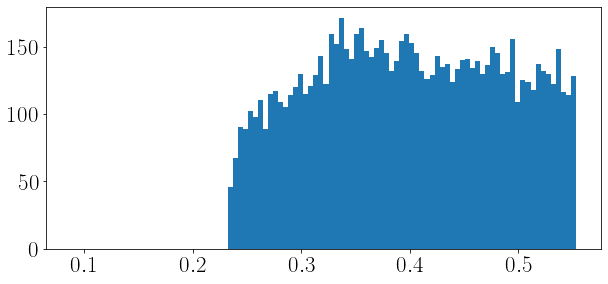

In [121]:
plt.hist(epgExp.loc[(epgExp.Q2bin==5)&((epgExp.xBbin==0))].t1, bins = np.linspace(tbin0, tbin4, 101))
plt.show()

In [162]:
df_global

,phi_i,phi_f,phi,xB_i,xB_f,xB,Q2_i,Q2_f,Q2,t_i,...,t,Q2xBt,binVol,Q2xBtphi,epgExpInb1,epgExpInb2,epgExpInb3,epgExpOutb1,epgExpOutb2,epgExpOutb3
0,0,12,0,0.061936,0.118402,0,1.000000,1.456000,0,0.088,...,0,000,0.000324,0,0,0,1,0,0,7
1,12,24,1,0.061936,0.118402,0,1.000000,1.456000,0,0.088,...,0,000,0.000324,1,0,0,1,0,0,9
2,24,36,2,0.061936,0.118402,0,1.000000,1.456000,0,0.088,...,0,000,0.000324,2,0,0,2,0,0,14
3,36,48,3,0.061936,0.118402,0,1.000000,1.456000,0,0.088,...,0,000,0.000324,3,0,0,0,0,0,8
4,48,60,4,0.061936,0.118402,0,1.000000,1.456000,0,0.088,...,0,000,0.000324,4,0,0,0,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,300,312,16,0.386765,0.558343,1,4.325656,6.244623,5,0.414,...,3,513,0.004793,1360,71,8,0,18,2,0
1361,312,324,17,0.386765,0.558343,1,4.325656,6.244623,5,0.414,...,3,513,0.004793,1361,57,10,0,10,5,0
1362,324,336,18,0.386765,0.558343,1,4.325656,6.244623,5,0.414,...,3,513,0.004793,1362,46,33,0,17,26,0
1363,336,348,19,0.386765,0.558343,1,4.325656,6.244623,5,0.414,...,3,513,0.004793,1363,47,60,0,33,36,0


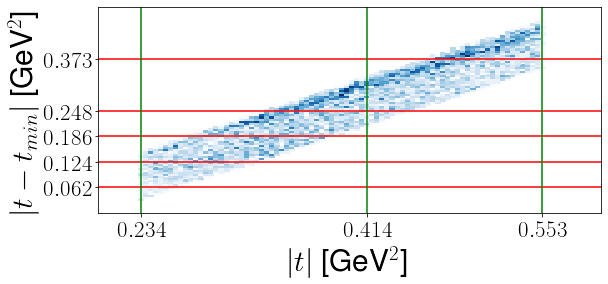

In [161]:
plt.hist2d(epgExp.loc[(epgExp.Q2bin==5)&((epgExp.xBbin==0))].t1, epgExp.loc[(epgExp.Q2bin==5)&((epgExp.xBbin==0))].t1-epgExp.loc[(epgExp.Q2bin==5)&((epgExp.xBbin==0))].tmin1, bins = [np.linspace(0.2, 0.6, 101), np.linspace(0, 0.5, 101)], cmin =1, cmap = cmap)
plt.xlabel(r"$|t|$" + " ["+GeV2+"]")
plt.ylabel(r"$|t - t_{min}|$" + " ["+GeV2+"]")
plt.axhline(0.062, color = 'r')
plt.axhline(0.124, color = 'r')
plt.axhline(0.186, color = 'r')
plt.axhline(0.248, color = 'r')
plt.axhline(0.373, color = 'r')
plt.axvline(tbin2, color = 'g')
plt.axvline(tbin3, color = 'g')
plt.axvline(tbin4, color = 'g')
plt.yticks([0.062, 0.124, 0.186, 0.248, 0.373])
plt.xticks([tbin2, tbin3, tbin4])
plt.show()

In [66]:
sum(df_global.epgExpInb1) + sum(df_global.epgExpInb2) + sum(df_global.epgExpInb3)

214516

In [117]:
sum(df_global.epgExpOutb1) + sum(df_global.epgExpOutb2) + sum(df_global.epgExpOutb3)

306414

In [68]:
len(phibin)

22

In [274]:
df_global.to_pickle("~/df_globalFeb.pkl")

<AxesSubplot:>

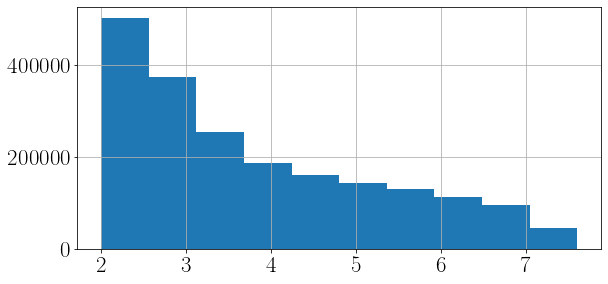

In [285]:
dvcsSimInb.loc[dvcsSimInb.radMode==1].Ep.hist()

In [334]:
def TruebinVol(Q2bin, xBbin, tbin, phibin, df, N1=10, N2=10, N3=10, N4=10):
    
    count = 0 
    
    Q2_i = Q2bin_i[Q2bin]
    Q2_f = Q2bin_f[Q2bin]
    xB_i = xBbin_i[Q2bin][xBbin]
    xB_f = xBbin_f[Q2bin][xBbin]
    t_i = tbin_i[tbin]
    t_f = tbin_f[tbin]
    phi_i = phibin_i[phibin]
    phi_f = phibin_f[phibin]
    
    local = df
    #cut by Q2
    if Q2bin == len(Q2bin_i)-1:
        local = local.loc[(local.Q2>=Q2_i) & (local.Q2<=Q2_f)]
    else:
        local = local.loc[(local.Q2>=Q2_i) & (local.Q2<Q2_f)]
    #cut by xB
    #xB lower bound
    if xBbin == 0:
        local = local.loc[local.Q2<=2*M*(10.604-2)*local.xB, :]
    else:
        local = local.loc[local.xB>=xB_i] 
    #xB upper bound
    if (xBbin == len(xBbin_i[Q2bin])-1) & (Q2bin < 3):
        local = local.loc[local.Q2>=2*M*3*local.xB]
    elif (xBbin == len(xBbin_i[Q2bin])-1) & (Q2bin < 5):
        local = local.loc[local.Q2>=(4 - M*M)*local.xB/(1 - local.xB)]
    else:
        local = local.loc[local.xB<xB_f]
    #cut by t
    if tbin == len(tbin_i)-1:
        local = local.loc[(local.t1>=t_i) & (local.t1<=t_f)]
    else:
        local = local.loc[(local.t1>=t_i) & (local.t1<t_f)]
                
    if isinstance(xB_i, list):
        xB_i = min(xB_i)
    if isinstance(xB_f, list):
        xB_f = max(xB_f)
    for q2ind in range(N1):
        for xind in range(N2):
            for tind in range(N3):
                for phiind in range(N4):
                    qmin = Q2_i + (Q2_f - Q2_i)*q2ind/N1
                    qmax = Q2_i + (Q2_f - Q2_i)*(q2ind+1)/N1
                    xmin = xB_i + (xB_f - xB_i)*xind/N2
                    xmax = xB_i + (xB_f - xB_i)*(xind+1)/N2
                    tmin = t_i + (t_f - t_i)*tind/N3
                    tmax = t_i + (t_f - t_i)*(tind+1)/N3
                    pmin = phi_i + (phi_f - phi_i)*phiind/N4
                    pmax = phi_i + (phi_f - phi_i)*(phiind+1)/N4
                    local2 = local.loc[(local.Q2>=qmin) & (local.Q2<qmax)]
                    local2 = local2.loc[(local2.xB>=xmin) & (local2.xB<xmax)]
                    local2 = local2.loc[(local2.t1>=tmin) & (local2.t1<tmax)]
                    local2 = local2.loc[(local2.phi1>=pmin) & (local2.phi1<pmax)]
                    if(len(local2)):
                        count += 1
    return count/N1/N2/N3/N4*(Q2_f - Q2_i)*(xB_f - xB_i)*(t_f - t_i)*np.radians(phi_f - phi_i)

In [342]:
TruebinVol(5, 0, 2, 14, dvcsSimInb, 6, 6, 6, 6)

0.008040901710292765

In [439]:
local502 = pd.read_pickle("local502_outb.pkl")

In [534]:
truebinvol = pd.read_pickle("truebinVol_outb.pkl")

In [535]:
truebinvol.loc[:, ["binVol", "binVolInb", "binVolOutb"]]

,binVol,binVolInb,binVolOutb
1281,0.004299,0.004180,0.003257
1282,0.004299,0.004067,0.003032
1283,0.004299,0.004100,0.002932
1284,0.004299,0.004279,0.002866
1285,0.004299,0.004425,0.002919
1286,0.004299,0.004704,0.002853
1287,0.008598,0.009355,0.005533
1288,0.008598,0.008771,0.004405
1289,0.008598,0.008067,0.002601
1290,0.008598,0.007829,0.001579


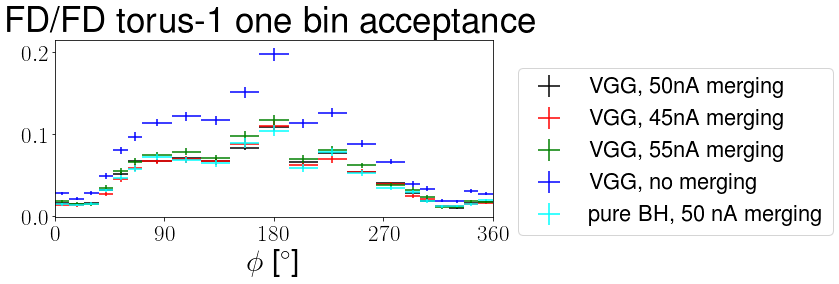

In [481]:
plt.errorbar(phibincenters, local502.dvcsSimInb50nA1/ local502.dvcsGenInb50nA, linestyle ='', xerr = phibinwidths, yerr = local502.dvcsSimInb50nA1/local502.dvcsGenInb50nA*np.sqrt(1/local502.dvcsSimInb50nA1 + 1/local502.dvcsGenInb50nA), color = 'k', label = "VGG, 50nA merging")
plt.errorbar(phibincenters, local502.dvcsSimInb55nA1/ local502.dvcsGenInb55nA, linestyle ='', xerr = phibinwidths, yerr = local502.dvcsSimInb55nA1/local502.dvcsGenInb55nA*np.sqrt(1/local502.dvcsSimInb55nA1 + 1/local502.dvcsGenInb55nA), color = 'r', label = "VGG, 45nA merging")
plt.errorbar(phibincenters, local502.dvcsSimInb45nA1/ local502.dvcsGenInb45nA, linestyle ='', xerr = phibinwidths, yerr = local502.dvcsSimInb45nA1/local502.dvcsGenInb45nA*np.sqrt(1/local502.dvcsSimInb45nA1 + 1/local502.dvcsGenInb45nA), color = 'g', label = "VGG, 55nA merging")
plt.errorbar(phibincenters, local502.dvcsSimInb0nA1/ local502.dvcsGenInb0nA, linestyle ='', xerr = phibinwidths, yerr = local502.dvcsSimInb0nA1/local502.dvcsGenInb0nA*np.sqrt(1/local502.dvcsSimInb0nA1 + 1/local502.dvcsGenInb0nA), color = 'b', label = "VGG, no merging")
plt.errorbar(phibincenters, local502.bhSimInb50nA1/ local502.bhGenInb50nA, linestyle ='', xerr = phibinwidths, yerr = local502.bhSimInb50nA1/local502.bhGenInb50nA*np.sqrt(1/local502.bhSimInb50nA1 + 1/local502.bhGenInb50nA), color = 'cyan', label = 'pure BH, 50 nA merging')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.8, 0.9))
plt.xlim([0, 360])
plt.xticks([0, 90, 180, 270, 360])
plt.xlabel(r"$\phi$"+" ["+degree+"]")
plt.tight_layout()
plt.title("FD/FD torus-1 one bin acceptance")
plt.show()

In [451]:
local502.dvcsSimInb45nA1/ local502.dvcsGenInb45nA

1281    0.018646
1282    0.015753
1283    0.014860
1284    0.035207
1285    0.055774
1286    0.066805
1287    0.074593
1288    0.079087
1289    0.071122
1290    0.098473
1291    0.117415
1292    0.070148
1293    0.080803
1294    0.062125
1295    0.038153
1296    0.032344
1297    0.024271
1298    0.011120
1299    0.011626
1300    0.018551
1301    0.018136
dtype: float64

In [452]:
local502.dvcsSimInb0nA1/ local502.dvcsGenInb0nA

1281    0.028332
1282    0.021645
1283    0.028783
1284    0.049174
1285    0.080660
1286    0.097156
1287    0.114378
1288    0.122035
1289    0.117470
1290    0.151591
1291    0.197771
1292    0.113722
1293    0.126469
1294    0.088828
1295    0.066890
1296    0.039840
1297    0.034049
1298    0.019211
1299    0.018759
1300    0.031167
1301    0.027601
dtype: float64

In [453]:
local502.dvcsSimInb55nA1/ local502.dvcsGenInb55nA

1281    0.013881
1282    0.013547
1283    0.015065
1284    0.027717
1285    0.045047
1286    0.059489
1287    0.067037
1288    0.069513
1289    0.067109
1290    0.088797
1291    0.110117
1292    0.062232
1293    0.069691
1294    0.054672
1295    0.039922
1296    0.025300
1297    0.020765
1298    0.012279
1299    0.012165
1300    0.015089
1301    0.016531
dtype: float64

In [454]:
local502.bhSimInb50nA1/ local502.bhGenInb50nA

1281    0.014636
1282    0.014141
1283    0.015586
1284    0.031716
1285    0.047210
1286    0.058335
1287    0.072188
1288    0.068704
1289    0.064920
1290    0.089360
1291    0.104456
1292    0.059208
1293    0.078139
1294    0.053330
1295    0.035158
1296    0.030060
1297    0.018810
1298    0.012168
1299    0.012483
1300    0.014683
1301    0.019932
dtype: float64

In [407]:
invaccInbFD = local502.dvcsGenInb50nA/local502.dvcsSimInb50nA1
invaccInbFDunc = invaccInbFD * np.sqrt(1/local502.dvcsSimInb50nA1 + 1/local502.dvcsGenInb50nA)
invaccInbFD.loc[local502.dvcsSimInb50nA1<100] = 0
invaccInbFDunc.loc[local502.dvcsSimInb50nA1<100] = 0


invaccInbCD = local502.dvcsGenInb50nA/local502.dvcsSimInb50nA2
invaccInbCDunc = invaccInbCD * np.sqrt(1/local502.dvcsSimInb50nA2 + 1/local502.dvcsGenInb50nA)
invaccInbCD.loc[local502.dvcsSimInb50nA2<100] = 0
invaccInbCDunc.loc[local502.dvcsSimInb50nA2<100] = 0


invaccInbCDFT = local502.dvcsGenInb50nA/local502.dvcsSimInb50nA3
invaccInbCDFTunc = invaccInbCDFT * np.sqrt(1/local502.dvcsSimInb50nA3 + 1/local502.dvcsGenInb50nA)
invaccInbCDFT.loc[local502.dvcsSimInb50nA3<100] = 0
invaccInbCDFTunc.loc[local502.dvcsSimInb50nA3<100] = 0

In [496]:
invaccOutbFD = local502.dvcsGenOutb50nA/local502.dvcsSimOutb50nA1
invaccOutbFDunc = invaccOutbFD * np.sqrt(1/local502.dvcsSimOutb50nA1 + 1/local502.dvcsGenOutb50nA)
invaccOutbFD.loc[local502.dvcsSimOutb50nA1<200] = 0
invaccOutbFDunc.loc[local502.dvcsSimOutb50nA1<200] = 0


invaccOutbCD = local502.dvcsGenOutb50nA/local502.dvcsSimOutb50nA2
invaccOutbCDunc = invaccOutbCD * np.sqrt(1/local502.dvcsSimOutb50nA2 + 1/local502.dvcsGenOutb50nA)
invaccOutbCD.loc[local502.dvcsSimOutb50nA2<200] = 0
invaccOutbCDunc.loc[local502.dvcsSimOutb50nA2<200] = 0


invaccOutbCDFT = local502.dvcsGenOutb50nA/local502.dvcsSimOutb50nA3
invaccOutbCDFTunc = invaccOutbCDFT * np.sqrt(1/local502.dvcsSimOutb50nA3 + 1/local502.dvcsGenOutb50nA)
invaccOutbCDFT.loc[local502.dvcsSimOutb50nA3<200] = 0
invaccOutbCDFTunc.loc[local502.dvcsSimOutb50nA3<200] = 0

In [519]:
local502.epgExpInb1

1281     56
1282     41
1283     39
1284     56
1285     87
1286     95
1287    127
1288    128
1289    111
1290    118
1291    156
1292     78
1293    115
1294     92
1295    100
1296     38
1297     33
1298     13
1299     19
1300     36
1301     47
Name: epgExpInb1, dtype: int64

In [648]:
def makezero(series):
    series.loc[np.isnan(series)] = 0
    return series

In [650]:
makezero(contInbCDFTunc/contInbCDFT)

1281    0.284859
1282    0.244473
1283    0.370930
1284    0.000000
1285    0.000000
1286    0.000000
1287    0.000000
1288    0.000000
1289    0.000000
1290    0.000000
1291    0.000000
1292    0.000000
1293    0.000000
1294    0.000000
1295    0.000000
1296    0.000000
1297    0.000000
1298    0.000000
1299    0.448920
1300    0.367181
1301    0.172152
dtype: float64

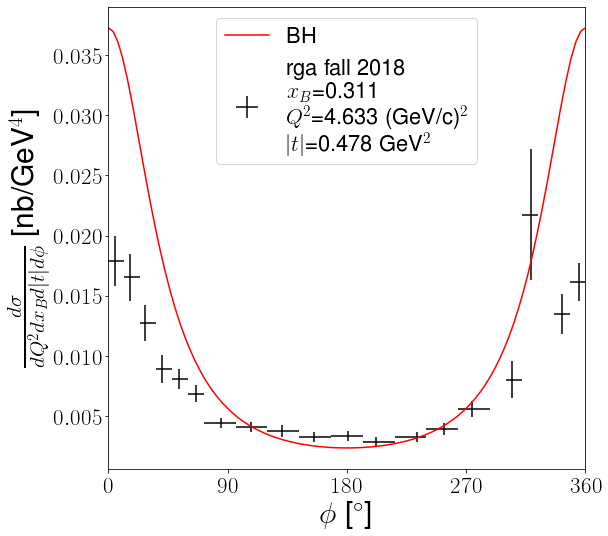

In [657]:
plt.rcParams["figure.figsize"] = (9, 8)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30

Fradunc = ((1-fsInb1)/fsInb1*truebinvol.dvcsSimInb50nA_sPeak1 + (1-fpInb1)/fpInb1*truebinvol.dvcsSimInb50nA_pPeak1)/(truebinvol.dvcsSimInb50nA_non1 +(1)/fsInb1*truebinvol.dvcsSimInb50nA_sPeak1 + (1)/fpInb1*truebinvol.dvcsSimInb50nA_pPeak1)/2

xsecInbFD = invaccInbFD * (local502.epgExpInb1 - contInbFD)/truebinvol.binVolInb/56.5/10**6/Frad
xsecInbFDunc = xsecInbFD*np.sqrt(1/local502.dvcsSimInb50nA1 + 1/local502.dvcsGenInb50nA  + 1/(local502.epgExpInb1)+(contInbFDunc/contInbFD)**2 + Fradunc**2) 
xsecInbFD.loc[local502.epgExpInb1<20] = 0
xsecInbFDunc.loc[local502.epgExpInb1<20] = 0

xsecInbCD = invaccInbCD * (local502.epgExpInb2 - contInbCD)/truebinvol.binVolInb/56.5/10**6/Frad
xsecInbCDunc = xsecInbCD*np.sqrt(1/local502.dvcsSimInb50nA2 + 1/local502.dvcsGenInb50nA  + 1/(local502.epgExpInb2)+(contInbCDunc/contInbCD)**2 + Fradunc**2)
xsecInbCD.loc[local502.epgExpInb2<20] = 0
xsecInbCDunc.loc[local502.epgExpInb2<20] = 0

xsecInbCDFT = invaccInbCDFT * (local502.epgExpInb3 - contInbCDFT)/truebinvol.binVolInb/56.5/10**6/Frad
xsecInbCDFTunc = xsecInbCDFT*np.sqrt(1/local502.dvcsSimInb50nA3 + 1/local502.dvcsGenInb50nA  + 1/(local502.epgExpInb3)+(contInbCDFTunc/contInbCDFT)**2 + Fradunc**2)
xsecInbCDFT.loc[local502.epgExpInb3<20] = 0
xsecInbCDFTunc.loc[local502.epgExpInb3<20] = 0

xsecOutbFD = invaccOutbFD * (local502.epgExpOutb1 - contOutbFD)/truebinvol.binVolOutb/56.5/10**6/Frad
xsecOutbFDunc = xsecOutbFD*np.sqrt(1/local502.dvcsSimOutb50nA1 + 1/local502.dvcsGenOutb50nA  + 1/(local502.epgExpOutb1)+(contOutbFDunc/contOutbFD)**2 + Fradunc**2)
xsecOutbFD.loc[local502.epgExpOutb1<20] = 0
xsecOutbFDunc.loc[local502.epgExpOutb1<20] = 0

xsecOutbCD = invaccOutbCD * (local502.epgExpOutb2 - contOutbCD)/truebinvol.binVolOutb/56.5/10**6/Frad
xsecOutbCDunc = xsecOutbCD*np.sqrt(1/local502.dvcsSimOutb50nA2 + 1/local502.dvcsGenOutb50nA  + 1/(local502.epgExpOutb2)+(contOutbCDunc/contOutbCD)**2 + Fradunc**2)
xsecOutbCD.loc[local502.epgExpOutb2<20] = 0
xsecOutbCDunc.loc[local502.epgExpOutb2<20] = 0

xsecOutbCDFT = invaccOutbCDFT * (local502.epgExpOutb3 - contOutbCDFT)/truebinvol.binVolOutb/56.5/10**6/Frad
xsecOutbCDFTunc = xsecOutbCDFT*np.sqrt(1/local502.dvcsSimOutb50nA3 + 1/local502.dvcsGenOutb50nA  + 1/(local502.epgExpOutb3)+(contOutbCDFTunc/contOutbCDFT)**2 + Fradunc**2)
xsecOutbCDFT.loc[local502.epgExpOutb3<20] = 0
xsecOutbCDFTunc.loc[local502.epgExpOutb3<20] = 0

# plt.errorbar(phibincenters, xsecInbFD, linestyle = '', xerr = phibinwidths, yerr = xsecInbFDunc)
# plt.errorbar(phibincenters, xsecInbCD, linestyle = '', xerr = phibinwidths, yerr = xsecInbCDunc)
# plt.errorbar(phibincenters, xsecInbCDFT, linestyle = '', xerr = phibinwidths, yerr = xsecInbCDFTunc)

# plt.errorbar(phibincenters, xsecOutbFD, linestyle = '', xerr = phibinwidths, yerr = xsecOutbFDunc)
# plt.errorbar(phibincenters, xsecOutbCD, linestyle = '', xerr = phibinwidths, yerr = xsecOutbCDunc)
# plt.errorbar(phibincenters, xsecOutbCDFT, linestyle = '', xerr = phibinwidths, yerr = xsecOutbCDFTunc)

xsecInbFDunc.loc[local502.epgExpInb1<20] = np.inf
xsecInbCDunc.loc[local502.epgExpInb2<20] = np.inf
xsecInbCDFTunc.loc[local502.epgExpInb3<20] = np.inf

xsecOutbFDunc.loc[local502.epgExpOutb1<20] = np.inf
xsecOutbCDunc.loc[local502.epgExpOutb2<20] = np.inf
xsecOutbCDFTunc.loc[local502.epgExpOutb3<20] = np.inf

avg = (xsecInbFD/xsecInbFDunc**2 + xsecInbCD/xsecInbCDunc**2 + xsecInbCDFT/xsecInbCDFTunc**2 + xsecOutbFD/xsecOutbFDunc**2 + xsecOutbCD/xsecOutbCDunc**2 + xsecOutbCDFT/xsecOutbCDFTunc**2)/(1/xsecInbFDunc**2+1/xsecInbCDunc**2+1/xsecInbCDFTunc**2+1/xsecOutbFDunc**2+1/xsecOutbCDunc**2+1/xsecOutbCDFTunc**2)

plt.errorbar(np.degrees(phiarray502), avg, xerr = [np.degrees(phiarray502) - np.array(phibin_i), np.array(phibin_f) - np.degrees(phiarray502) ], yerr = np.sqrt(1/(1/xsecInbFDunc**2+1/xsecInbCDunc**2+1/xsecInbCDFTunc**2+1/xsecOutbFDunc**2+1/xsecOutbCDunc**2+1/xsecOutbCDFTunc**2)), linestyle = '', color = 'k', label = 'rga fall 2018\n '+r'$x_B$'+'={:0.3f}\n'.format(xBmean)+r'$Q^2$'+'={:0.3f} '.format(Q2mean)+GeVc2+"\n"+r'$|t|$'+'={:0.3f} '.format(tmean)+GeV2)

plt.plot(np.degrees(phiarray), dsarray, color = 'r', label = 'BH')
plt.xlim([0, 360])
plt.xticks([0, 90, 180, 270, 360])
plt.xlabel(r"$\phi$"+" ["+degree+"]")
plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")
plt.legend(loc = 'best')
plt.show()

In [560]:
truebinvol.binVolOutb/truebinvol.binVol

1281    0.757716
1282    0.705247
1283    0.682099
1284    0.666667
1285    0.679012
1286    0.663580
1287    0.643519
1288    0.512346
1289    0.302469
1290    0.183642
1291    0.179012
1292    0.217593
1293    0.324074
1294    0.507716
1295    0.577160
1296    0.436728
1297    0.453704
1298    0.464506
1299    0.572531
1300    0.671296
1301    0.731481
dtype: float64

In [553]:
fsInb1 = (truebinvol.dvcsSimInb50nA_sPeak1/truebinvol.dvcsGenInb50nA_sPeak)/(truebinvol.dvcsSimInb50nA_non1/truebinvol.dvcsGenInb50nA_non)

In [554]:
fpInb1 = (truebinvol.dvcsSimInb50nA_pPeak1/truebinvol.dvcsGenInb50nA_pPeak)/(truebinvol.dvcsSimInb50nA_non1/truebinvol.dvcsGenInb50nA_non)

Text(0, 0.5, '$\\sigma_{rad}$')

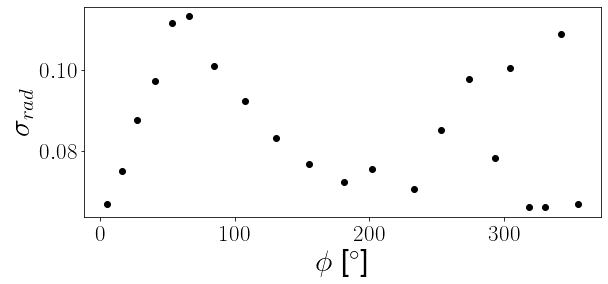

In [565]:
plt.rcParams["figure.figsize"] = (9, 4.5)
plt.scatter(np.degrees(phiarray502), ((1-fsInb1)/fsInb1*truebinvol.dvcsSimInb50nA_sPeak1 + (1-fpInb1)/fpInb1*truebinvol.dvcsSimInb50nA_pPeak1)/(truebinvol.dvcsSimInb50nA_non1 +(1)/fsInb1*truebinvol.dvcsSimInb50nA_sPeak1 + (1)/fpInb1*truebinvol.dvcsSimInb50nA_pPeak1), color = 'k')
plt.xlabel(r"$\phi$" + " ["+degree+"]")
plt.ylabel(r"$\sigma_{rad}$")

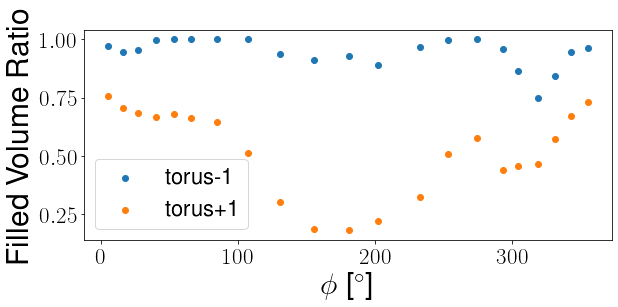

In [589]:
plt.scatter(np.degrees(phiarray502), truebinvol.binVolInb/truebinvol.binVol, label = 'torus-1')
plt.scatter(np.degrees(phiarray502), truebinvol.binVolOutb/truebinvol.binVol, label = 'torus+1')
plt.xlabel(r"$\phi$"+" ["+degree+"]")
plt.ylabel("Filled Volume Ratio")
plt.legend(loc = 'best')

In [583]:
truebinvol.loc[truebinvol.binVolInb>truebinvol.binVol, "binVolInb"] = truebinvol.binVol

In [81]:
def visualize(df_global, Q2xBtbin, config = 1, colName = "new", title = "", sub = None, scale = 'linear', errorbar = True):
    if not Q2xBtbin in goodBins:
        print("invalid bin number.")
        return False
    df = df_global.loc[df_global.Q2xBt==Q2xBtbin]
    bins_i = df.phi_i.to_numpy()
    bins_f = df.phi_f.to_numpy()
    bins_i = np.insert(bins_i, 0, 0)
    bins_i = np.insert(bins_i, len(bins_i), bins_f[-1])
    bins_f = np.insert(bins_f, 0, bins_i[1])
    bins_f = np.insert(bins_f, len(bins_f), 360)
    bincenters = np.array([0.5 * (bins_i[i] + bins_f[i]) for i in range(len(bins_i))])
    if config in [1, 2, 3]:
        entries = df.loc[:, colName+str(config)].to_numpy()
    elif config == "all":
        entries1 = df.loc[:, colName+"1"].to_numpy()
        entries2 = df.loc[:, colName+"2"].to_numpy()
        entries3 = df.loc[:, colName+"3"].to_numpy()
        entries = entries1 + entries2 + entries3
    print(entries)
    entries = np.insert(entries, 0, 0)
    entries = np.insert(entries, len(entries), 0)
    print(entries)
    plt.step(bincenters, entries, where = 'mid', color = 'k')
    if errorbar:
        plt.errorbar(bincenters, entries, yerr = np.sqrt(entries), color = 'k', linestyle = '')
    if config == "all":
        entries1 = np.insert(entries1, 0, 0)
        entries1 = np.insert(entries1, len(entries1), 0)
        entries2 = np.insert(entries2, 0, 0)
        entries2 = np.insert(entries2, len(entries2), 0)
        entries3 = np.insert(entries3, 0, 0)
        entries3 = np.insert(entries3, len(entries3), 0)
        if sub:
            plt.step(bincenters, entries1, where = 'mid', color = 'r')
            plt.step(bincenters, entries2, where = 'mid', color = 'g')
            plt.step(bincenters, entries3, where = 'mid', color = 'b')
    plt.xlim([0, 360])
    plt.xticks([0, 90, 180, 270, 360])
    plt.xlabel(r"$\phi$"+ " ["+degree+"]")
    if title:
        plt.title(title)
    else:
        plt.title(colName + str(config) + "\t" + str(Q2xBtbin))
    if scale == 'log':
        plt.yscale('log')
        plt.ylim([0.005, 1])
    plt.show()

[219 167  94  90  57  69  68  42  19  14  18  14  19  39  41  41  23  35
  74 153 247]
[  0 219 167  94  90  57  69  68  42  19  14  18  14  19  39  41  41  23
  35  74 153 247   0]


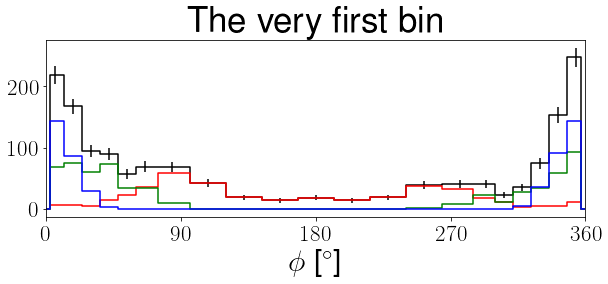

In [378]:
visualize(df_global, "502", config = "all", sub = True, colName = "epgExpOutb", title= "The very first bin")

In [88]:
def numberingGenDF(total, Q2bin_i=Q2bin_i, Q2bin_f=Q2bin_f, xBbin_i=xBbin_i, xBbin_f=xBbin_f, tbin_i=tbin_i, tbin_f=tbin_f, goodBins=goodBins, badBins=badBins, df_global=df_global):
    df_allBins = {}
    Q2xBtphi = 0

    for Q2bin in range(0, len(Q2bin_i)):#Q2 bin
        for xBbin in range(0, len(xBbin_i[Q2bin])):
            for tbin in range(0, len(tbin_i)):
                local = total
                Q2_i = Q2bin_i[Q2bin]
                Q2_f = Q2bin_f[Q2bin]
                xB_i = xBbin_i[Q2bin][xBbin]
                xB_f = xBbin_f[Q2bin][xBbin]
                t_i = tbin_i[tbin]
                t_f = tbin_f[tbin]
                #cut by Q2
                if Q2bin == len(Q2bin_i)-1:
                    local = local.loc[(local.GenQ2>=Q2_i) & (local.GenQ2<=Q2_f)]
                else:
                    local = local.loc[(local.GenQ2>=Q2_i) & (local.GenQ2<Q2_f)]
                #cut by xB
                #xB lower bound
                if xBbin == 0:
                    local = local.loc[local.GenQ2<=2*M*(10.604-2)*local.GenxB, :]
                else:
                    local = local.loc[local.GenxB>=xB_i] 
                #xB upper bound
                if (xBbin == len(xBbin_i[Q2bin])-1) & (Q2bin < 3):
                    local = local.loc[local.GenQ2>=2*M*3*local.GenxB]
                elif (xBbin == len(xBbin_i[Q2bin])-1) & (Q2bin < 5):
                    local = local.loc[local.GenQ2>=(4 - M*M)*local.GenxB/(1 - local.GenxB)]
                else:
                    local = local.loc[local.GenxB<xB_f]
                #cut by t
                if tbin == len(tbin_i)-1:
                    local = local.loc[(local.Gent2>=t_i) & (local.Gent2<=t_f)]
                else:
                    local = local.loc[(local.Gent2>=t_i) & (local.Gent2<t_f)]
                Q2xBtbin = "{}{}{}".format(Q2bin,xBbin,tbin)
                
                if Q2xBtbin in badBins:
                    continue

#                 phibin_i = df_global.loc[(df_global.Q2xBt == Q2xBtbin), "phi_i"].to_numpy()
#                 phibin_f = df_global.loc[(df_global.Q2xBt == Q2xBtbin), "phi_f"].to_numpy()
#                 phibin_f[-1] = 360
                for phi_ind in range(0, len(phibin_i)):
                    local.loc[:, "GenxBbin"] = xBbin
                    local.loc[:, "GenQ2bin"] = Q2bin
                    local.loc[:, "Gentbin"] = tbin
                    local.loc[:, "Genphibin"] = phi_ind
                    local.loc[:, "GenQ2xBtbin"] = Q2xBtbin
                    local.loc[:, "GenQ2xBtphi"] = Q2xBtphi
                    df_allBins[Q2xBtphi] = local.loc[(local.Genphi2>=phibin_i[phi_ind])&(local.Genphi2<phibin_f[phi_ind])]
                    Q2xBtphi += 1

    total = pd.concat(df_allBins.values()).sort_values( by = 'event')
    return total

In [89]:
df_3987_corr = numberingDF(df_3987_corr)
gen = numberingGenDF(df_3987_corr)
df_3987_corr.loc[(df_3987_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [90]:
df_4124_corr = numberingDF(df_4124_corr)
gen = numberingGenDF(df_4124_corr)
df_4124_corr.loc[(df_4124_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:,  ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [91]:
df_4139_corr = numberingDF(df_4139_corr)
gen = numberingGenDF(df_4139_corr)
df_4139_corr.loc[(df_4139_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [92]:
df_4181_corr = numberingDF(df_4181_corr)
gen = numberingGenDF(df_4181_corr)
df_4181_corr.loc[(df_4181_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [93]:
df_4182_corr = numberingDF(df_4182_corr)
gen = numberingGenDF(df_4182_corr)
df_4182_corr.loc[(df_4182_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [163]:
df_4238_corr = numberingDF(df_4238_corr)
gen = numberingGenDF(df_4238_corr)
df_4238_corr.loc[(df_4238_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [37]:
df_4076_1g_corr = numberingDF(df_4076_1g_corr)
df_4202_1g_corr = numberingDF(df_4202_1g_corr)
df_4209_1g_corr = numberingDF(df_4209_1g_corr)

In [38]:
df_4076_2g_corr = numberingDF(df_4076_2g_corr)
df_4202_2g_corr = numberingDF(df_4202_2g_corr)
df_4209_2g_corr = numberingDF(df_4209_2g_corr)

In [39]:
exp_2g_corr = numberingDF(exp_2g_corr)

In [164]:
pi0ExpInb = copy(exp_2g_corr)
dvcsSimInb = pd.concat([df_3987_corr, df_4124_corr, df_4139_corr, df_4181_corr, df_4182_corr])
bkgSimInb = pd.concat([df_4076_1g_corr, df_4202_1g_corr, df_4209_1g_corr])
pi0SimInb = pd.concat([df_4076_2g_corr, df_4202_2g_corr, df_4209_2g_corr])
bhSimInb = df_4238_corr

In [165]:
df_global = countDF(pi0ExpInb, df_global, "pi0ExpInb")
df_global = countDF(dvcsSimInb, df_global, "dvcsSimInb")
df_global = countDF(bkgSimInb, df_global, "bkgSimInb")
df_global = countDF(pi0SimInb, df_global, "pi0SimInb")
df_global = countDF(bhSimInb, df_global, "bhSimInb")

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350


In [377]:
local502.loc[local502.index == 1281].epgExpInb1

1281    56
Name: epgExpInb1, dtype: int64

In [314]:
local502 = df_global.loc[df_global.Q2xBt == "502"]

In [326]:
local502.pi0SimInb1

1281     50
1282     21
1283     19
1284     39
1285     63
1286    120
1287    358
1288    309
1289    197
1290    274
1291    320
1292    212
1293    209
1294    128
1295     97
1296     55
1297     31
1298     32
1299     15
1300     42
1301     39
Name: pi0SimInb1, dtype: int64

In [490]:
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/convPkl_outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/convPkl_outb/exp/"

df_4243_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")
df_4271_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4271.pkl")
df_4290_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4290.pkl")

pi0SimOutb = pd.concat([df_4243_2g_corr, df_4271_2g_corr, df_4290_2g_corr])

pi0ExpOutb = pd.read_pickle(parent_exp + "pi0.pkl")

In [343]:
contInbFD1 = (local502.pi0ExpInb1/local502.pi0SimInb1)*local502.bkgSimInb1
contInbFD1unc = contInbFD1 * np.sqrt(1/local502.pi0ExpInb1 + 1/local502.pi0SimInb1 + 1/local502.bkgSimInb1)
contInbFD1unc.loc[contInbFD1==np.inf] = 0
contInbFD1unc.loc[np.isnan(contInbFD1)] = 0
contInbFD1.loc[contInbFD1==np.inf] = 0
contInbFD1.loc[np.isnan(contInbFD1)] = 0

contInbFD2 = sum(local502.pi0ExpInb1)/sum(local502.pi0SimInb1)*local502.bkgSimInb1
contInbFD2unc = contInbFD2 * np.sqrt(1/sum(local502.pi0ExpInb1) + 1/sum(local502.pi0SimInb1) + 1/local502.bkgSimInb1)
contInbFD2unc.loc[contInbFD2==np.inf] = 0
contInbFD2unc.loc[np.isnan(contInbFD2)] = 0
contInbFD2.loc[contInbFD2==np.inf] = 0
contInbFD2.loc[np.isnan(contInbFD2)] = 0

contInbFD3 = sum(df_global.pi0ExpInb1)/sum(df_global.pi0SimInb1)*local502.bkgSimInb1
contInbFD3unc = contInbFD3 * np.sqrt(1/sum(df_global.pi0ExpInb1) + 1/sum(df_global.pi0SimInb1) + 1/local502.bkgSimInb1)
contInbFD3unc.loc[contInbFD3==np.inf] = 0
contInbFD3unc.loc[np.isnan(contInbFD3)] = 0
contInbFD3.loc[contInbFD3==np.inf] = 0
contInbFD3.loc[np.isnan(contInbFD3)] = 0

contInbCD1 = (local502.pi0ExpInb2/local502.pi0SimInb2)*local502.bkgSimInb2
contInbCD1unc = contInbCD1 * np.sqrt(1/local502.pi0ExpInb2 + 1/local502.pi0SimInb2 + 1/local502.bkgSimInb2)
contInbCD1unc.loc[contInbCD1==np.inf] = 0
contInbCD1unc.loc[np.isnan(contInbCD1)] = 0
contInbCD1.loc[contInbCD1==np.inf] = 0
contInbCD1.loc[np.isnan(contInbCD1)] = 0

contInbCD2 = sum(local502.pi0ExpInb2)/sum(local502.pi0SimInb2)*local502.bkgSimInb2
contInbCD2unc = contInbCD2 * np.sqrt(1/sum(local502.pi0ExpInb2) + 1/sum(local502.pi0SimInb2) + 1/local502.bkgSimInb2)
contInbCD2unc.loc[contInbCD2==np.inf] = 0
contInbCD2unc.loc[np.isnan(contInbCD2)] = 0
contInbCD2.loc[contInbCD2==np.inf] = 0
contInbCD2.loc[np.isnan(contInbCD2)] = 0

contInbCD3 = sum(df_global.pi0ExpInb2)/sum(df_global.pi0SimInb2)*local502.bkgSimInb2
contInbCD3unc = contInbCD3 * np.sqrt(1/sum(df_global.pi0ExpInb2) + 1/sum(df_global.pi0SimInb2) + 1/local502.bkgSimInb2)
contInbCD3unc.loc[contInbCD3==np.inf] = 0
contInbCD3unc.loc[np.isnan(contInbCD3)] = 0
contInbCD3.loc[contInbCD3==np.inf] = 0
contInbCD3.loc[np.isnan(contInbCD3)] = 0

contInbCDFT1 = (local502.pi0ExpInb3/local502.pi0SimInb3)*local502.bkgSimInb3
contInbCDFT1unc = contInbCDFT1 * np.sqrt(1/local502.pi0ExpInb3 + 1/local502.pi0SimInb3 + 1/local502.bkgSimInb3)
contInbCDFT1unc.loc[contInbCDFT1==np.inf] = 0
contInbCDFT1unc.loc[np.isnan(contInbCDFT1)] = 0
contInbCDFT1.loc[contInbCDFT1==np.inf] = 0
contInbCDFT1.loc[np.isnan(contInbCDFT1)] = 0

contInbCDFT2 = sum(local502.pi0ExpInb3)/sum(local502.pi0SimInb3)*local502.bkgSimInb3
contInbCDFT2unc = contInbCDFT2 * np.sqrt(1/sum(local502.pi0ExpInb3) + 1/sum(local502.pi0SimInb3) + 1/local502.bkgSimInb3)
contInbCDFT2unc.loc[contInbCDFT2==np.inf] = 0
contInbCDFT2unc.loc[np.isnan(contInbCDFT2)] = 0
contInbCDFT2.loc[contInbCDFT2==np.inf] = 0
contInbCDFT2.loc[np.isnan(contInbCDFT2)] = 0

contInbCDFT3 = sum(df_global.pi0ExpInb3)/sum(df_global.pi0SimInb3)*local502.bkgSimInb3
contInbCDFT3unc = contInbCDFT3 * np.sqrt(1/sum(df_global.pi0ExpInb3) + 1/sum(df_global.pi0SimInb3) + 1/local502.bkgSimInb3)
contInbCDFT3unc.loc[contInbCDFT3==np.inf] = 0
contInbCDFT3unc.loc[np.isnan(contInbCDFT3)] = 0
contInbCDFT3.loc[contInbCDFT3==np.inf] = 0
contInbCDFT3.loc[np.isnan(contInbCDFT3)] = 0

In [492]:
contOutbFD1 = (local502.pi0ExpOutb1/local502.pi0SimOutb50nA1)*local502.bkgSimOutb50nA1
contOutbFD1unc = contOutbFD1 * np.sqrt(1/local502.pi0ExpOutb1 + 1/local502.pi0SimOutb50nA1 + 1/local502.bkgSimOutb50nA1)
contOutbFD1unc.loc[contOutbFD1==np.inf] = 0
contOutbFD1unc.loc[np.isnan(contOutbFD1)] = 0
contOutbFD1.loc[contOutbFD1==np.inf] = 0
contOutbFD1.loc[np.isnan(contOutbFD1)] = 0

contOutbFD2 = sum(local502.pi0ExpOutb1)/sum(local502.pi0SimOutb50nA1)*local502.bkgSimOutb50nA1
contOutbFD2unc = contOutbFD2 * np.sqrt(1/sum(local502.pi0ExpOutb1) + 1/sum(local502.pi0SimOutb50nA1) + 1/local502.bkgSimOutb50nA1)
contOutbFD2unc.loc[contOutbFD2==np.inf] = 0
contOutbFD2unc.loc[np.isnan(contOutbFD2)] = 0
contOutbFD2.loc[contOutbFD2==np.inf] = 0
contOutbFD2.loc[np.isnan(contOutbFD2)] = 0

contOutbFD3 = sum(pi0ExpOutb.config==1)/sum(pi0SimOutb.config==1)*local502.bkgSimOutb50nA1
contOutbFD3unc = contOutbFD3 * np.sqrt(1/sum(pi0ExpOutb.config==1) + 1/sum(pi0SimOutb.config==1) + 1/local502.bkgSimOutb50nA1)
contOutbFD3unc.loc[contOutbFD3==np.inf] = 0
contOutbFD3unc.loc[np.isnan(contOutbFD3)] = 0
contOutbFD3.loc[contOutbFD3==np.inf] = 0
contOutbFD3.loc[np.isnan(contOutbFD3)] = 0

contOutbCD1 = (local502.pi0ExpOutb2/local502.pi0SimOutb50nA2)*local502.bkgSimOutb50nA2
contOutbCD1unc = contOutbCD1 * np.sqrt(1/local502.pi0ExpOutb2 + 1/local502.pi0SimOutb50nA2 + 1/local502.bkgSimOutb50nA2)
contOutbCD1unc.loc[contOutbCD1==np.inf] = 0
contOutbCD1unc.loc[np.isnan(contOutbCD1)] = 0
contOutbCD1.loc[contOutbCD1==np.inf] = 0
contOutbCD1.loc[np.isnan(contOutbCD1)] = 0

contOutbCD2 = sum(local502.pi0ExpOutb2)/sum(local502.pi0SimOutb50nA2)*local502.bkgSimOutb50nA2
contOutbCD2unc = contOutbCD2 * np.sqrt(1/sum(local502.pi0ExpOutb2) + 1/sum(local502.pi0SimOutb50nA2) + 1/local502.bkgSimOutb50nA2)
contOutbCD2unc.loc[contOutbCD2==np.inf] = 0
contOutbCD2unc.loc[np.isnan(contOutbCD2)] = 0
contOutbCD2.loc[contOutbCD2==np.inf] = 0
contOutbCD2.loc[np.isnan(contOutbCD2)] = 0

contOutbCD3 = sum(pi0ExpOutb.config==2)/sum(pi0SimOutb.config==2)*local502.bkgSimOutb50nA2
contOutbCD3unc = contOutbCD3 * np.sqrt(1/sum(pi0ExpOutb.config==2) + 1/sum(pi0SimOutb.config==2) + 1/local502.bkgSimOutb50nA2)
contOutbCD3unc.loc[contOutbCD3==np.inf] = 0
contOutbCD3unc.loc[np.isnan(contOutbCD3)] = 0
contOutbCD3.loc[contOutbCD3==np.inf] = 0
contOutbCD3.loc[np.isnan(contOutbCD3)] = 0

contOutbCDFT1 = (local502.pi0ExpOutb3/local502.pi0SimOutb50nA3)*local502.bkgSimOutb50nA3
contOutbCDFT1unc = contOutbCDFT1 * np.sqrt(1/local502.pi0ExpOutb3 + 1/local502.pi0SimOutb50nA3 + 1/local502.bkgSimOutb50nA3)
contOutbCDFT1unc.loc[contOutbCDFT1==np.inf] = 0
contOutbCDFT1unc.loc[np.isnan(contOutbCDFT1)] = 0
contOutbCDFT1.loc[contOutbCDFT1==np.inf] = 0
contOutbCDFT1.loc[np.isnan(contOutbCDFT1)] = 0

contOutbCDFT2 = sum(local502.pi0ExpOutb3)/sum(local502.pi0SimOutb50nA3)*local502.bkgSimOutb50nA3
contOutbCDFT2unc = contOutbCDFT2 * np.sqrt(1/sum(local502.pi0ExpOutb3) + 1/sum(local502.pi0SimOutb50nA3) + 1/local502.bkgSimOutb50nA3)
contOutbCDFT2unc.loc[contOutbCDFT2==np.inf] = 0
contOutbCDFT2unc.loc[np.isnan(contOutbCDFT2)] = 0
contOutbCDFT2.loc[contOutbCDFT2==np.inf] = 0
contOutbCDFT2.loc[np.isnan(contOutbCDFT2)] = 0

contOutbCDFT3 = sum(pi0ExpOutb.config==3)/sum(pi0SimOutb.config==3)*local502.bkgSimOutb50nA3
contOutbCDFT3unc = contOutbCDFT3 * np.sqrt(1/sum(pi0ExpOutb.config==3) + 1/sum(pi0SimOutb.config==3) + 1/local502.bkgSimOutb50nA3)
contOutbCDFT3unc.loc[contOutbCDFT3==np.inf] = 0
contOutbCDFT3unc.loc[np.isnan(contOutbCDFT3)] = 0
contOutbCDFT3.loc[contOutbCDFT3==np.inf] = 0
contOutbCDFT3.loc[np.isnan(contOutbCDFT3)] = 0

In [621]:
contInbFD1unc.loc[contInbFD1unc==np.inf] = np.inf
contInbFD1unc.loc[np.isnan(contInbFD1unc)] = np.inf

contInbFD2unc.loc[contInbFD2unc==np.inf] = np.inf
contInbFD2unc.loc[np.isnan(contInbFD2unc)] = np.inf

contInbFD3unc.loc[contInbFD3unc==np.inf] = np.inf
contInbFD3unc.loc[np.isnan(contInbFD3unc)] = np.inf

contInbCD1unc.loc[contInbCD1unc==np.inf] = np.inf
contInbCD1unc.loc[np.isnan(contInbCD1unc)] = np.inf

contInbCD2unc.loc[contInbCD2unc==np.inf] = np.inf
contInbCD2unc.loc[np.isnan(contInbCD2unc)] = np.inf

contInbCD3unc.loc[contInbCD3unc==np.inf] = np.inf
contInbCD3unc.loc[np.isnan(contInbCD3unc)] = np.inf

contInbCDFT1unc.loc[contInbCDFT1unc==np.inf] = np.inf
contInbCDFT1unc.loc[np.isnan(contInbCDFT1unc)] = np.inf

contInbCDFT2unc.loc[contInbCDFT2unc==np.inf] = np.inf
contInbCDFT2unc.loc[np.isnan(contInbCDFT2unc)] = np.inf

contInbCDFT3unc.loc[contInbCDFT3unc==np.inf] = np.inf
contInbCDFT3unc.loc[np.isnan(contInbCDFT3unc)] = np.inf

contOutbFD1unc.loc[contOutbFD1unc==np.inf] = np.inf
contOutbFD1unc.loc[np.isnan(contOutbFD1unc)] = np.inf

contOutbFD2unc.loc[contOutbFD2unc==np.inf] = np.inf
contOutbFD2unc.loc[np.isnan(contOutbFD2unc)] = np.inf

contOutbFD3unc.loc[contOutbFD3unc==np.inf] = np.inf
contOutbFD3unc.loc[np.isnan(contOutbFD3unc)] = np.inf

contOutbCD1unc.loc[contOutbCD1unc==np.inf] = np.inf
contOutbCD1unc.loc[np.isnan(contOutbCD1unc)] = np.inf

contOutbCD2unc.loc[contOutbCD2unc==np.inf] = np.inf
contOutbCD2unc.loc[np.isnan(contOutbCD2unc)] = np.inf

contOutbCD3unc.loc[contOutbCD3unc==np.inf] = np.inf
contOutbCD3unc.loc[np.isnan(contOutbCD3unc)] = np.inf

contOutbCDFT1unc.loc[contOutbCDFT1unc==np.inf] = np.inf
contOutbCDFT1unc.loc[np.isnan(contOutbCDFT1unc)] = np.inf

contOutbCDFT2unc.loc[contOutbCDFT2unc==np.inf] = np.inf
contOutbCDFT2unc.loc[np.isnan(contOutbCDFT2unc)] = np.inf

contOutbCDFT3unc.loc[contOutbCDFT3unc==np.inf] = np.inf
contOutbCDFT3unc.loc[np.isnan(contOutbCDFT3unc)] = np.inf

In [622]:
contInbFD = (contInbFD1/contInbFD1unc**2 + contInbFD2/contInbFD2unc**2 + contInbFD3/contInbFD3unc**2) / (1/contInbFD1unc**2 + 1/contInbFD2unc**2 + 1/contInbFD3unc**2)
contInbFDunc = np.sqrt(1/(1/contInbFD1unc**2 + 1/contInbFD2unc**2 + 1/contInbFD3unc**2))

contInbCD = (contInbCD1/contInbCD1unc**2 + contInbCD2/contInbCD2unc**2 + contInbCD3/contInbCD3unc**2) / (1/contInbCD1unc**2 + 1/contInbCD2unc**2 + 1/contInbCD3unc**2)
contInbCDunc = np.sqrt(1/(1/contInbCD1unc**2 + 1/contInbCD2unc**2 + 1/contInbCD3unc**2))

contInbCDFT = (contInbCDFT1/contInbCDFT1unc**2 + contInbCDFT2/contInbCDFT2unc**2 + contInbCDFT3/contInbCDFT3unc**2) / (1/contInbCDFT1unc**2 + 1/contInbCDFT2unc**2 + 1/contInbCDFT3unc**2)
contInbCDFTunc = np.sqrt(1/(1/contInbCDFT1unc**2 + 1/contInbCDFT2unc**2 + 1/contInbCDFT3unc**2))

contOutbFD = (contOutbFD1/contOutbFD1unc**2 + contOutbFD2/contOutbFD2unc**2 + contOutbFD3/contOutbFD3unc**2) / (1/contOutbFD1unc**2 + 1/contOutbFD2unc**2 + 1/contOutbFD3unc**2)
contOutbFDunc = np.sqrt(1/(1/contOutbFD1unc**2 + 1/contOutbFD2unc**2 + 1/contOutbFD3unc**2))

contOutbCD = (contOutbCD1/contOutbCD1unc**2 + contOutbCD2/contOutbCD2unc**2 + contOutbCD3/contOutbCD3unc**2) / (1/contOutbCD1unc**2 + 1/contOutbCD2unc**2 + 1/contOutbCD3unc**2)
contOutbCDunc = np.sqrt(1/(1/contOutbCD1unc**2 + 1/contOutbCD2unc**2 + 1/contOutbCD3unc**2))

contOutbCDFT = (contOutbCDFT1/contOutbCDFT1unc**2 + contOutbCDFT2/contOutbCDFT2unc**2 + contOutbCDFT3/contOutbCDFT3unc**2) / (1/contOutbCDFT1unc**2 + 1/contOutbCDFT2unc**2 + 1/contOutbCDFT3unc**2)
contOutbCDFTunc = np.sqrt(1/(1/contOutbCDFT1unc**2 + 1/contOutbCDFT2unc**2 + 1/contOutbCDFT3unc**2))

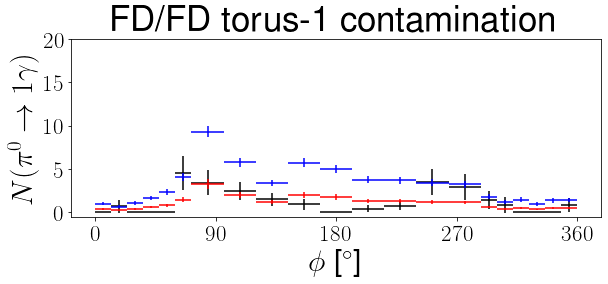

In [344]:
plt.errorbar(phibincenters, contInbFD1, yerr = c1unc, xerr= phibinwidths, linestyle = '', color = 'k')
plt.errorbar(phibincenters, contInbFD2, yerr = c2unc, xerr= phibinwidths, linestyle = '', color = 'r')
plt.errorbar(phibincenters, contInbFD3, yerr = c3unc, xerr= phibinwidths, linestyle = '', color = 'b')
# plt.errorbar(phibincenters, local502.epgExpInb1, yerr = c3unc, xerr= phibinwidths, linestyle = '', color = 'g')

plt.ylabel(r"$N(\pi^0\rightarrow 1\gamma)$" )
plt.xlabel(r"$\phi$"+" ["+degree+"]")

plt.title("FD/FD torus-1 contamination")

plt.xticks([0, 90, 180, 270, 360])
plt.yticks([0, 5, 10, 15, 20])
plt.show()

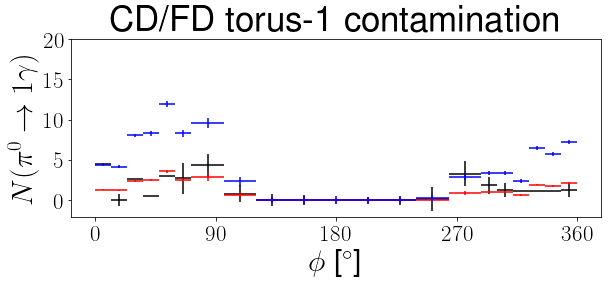

In [345]:
plt.errorbar(phibincenters, contInbCD1, yerr = c1unc, xerr= phibinwidths, linestyle = '', color = 'k')
plt.errorbar(phibincenters, contInbCD2, yerr = c2unc, xerr= phibinwidths, linestyle = '', color = 'r')
plt.errorbar(phibincenters, contInbCD3, yerr = c3unc, xerr= phibinwidths, linestyle = '', color = 'b')
# plt.errorbar(phibincenters, local502.epgExpInb1, yerr = c3unc, xerr= phibinwidths, linestyle = '', color = 'g')

plt.ylabel(r"$N(\pi^0\rightarrow 1\gamma)$" )
plt.xlabel(r"$\phi$"+" ["+degree+"]")

plt.title("CD/FD torus-1 contamination")

plt.xticks([0, 90, 180, 270, 360])
plt.yticks([0, 5, 10, 15])
plt.show()

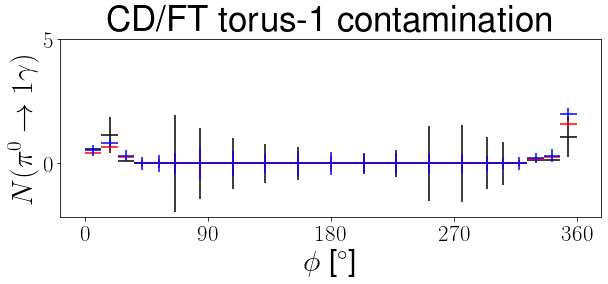

In [347]:
plt.errorbar(phibincenters, contInbCDFT1, yerr = c1unc, xerr= phibinwidths, linestyle = '', color = 'k')
plt.errorbar(phibincenters, contInbCDFT2, yerr = c2unc, xerr= phibinwidths, linestyle = '', color = 'r')
plt.errorbar(phibincenters, contInbCDFT3, yerr = c3unc, xerr= phibinwidths, linestyle = '', color = 'b')
# plt.errorbar(phibincenters, local502.epgExpInb1, yerr = c3unc, xerr= phibinwidths, linestyle = '', color = 'g')

plt.ylabel(r"$N(\pi^0\rightarrow 1\gamma)$" )
plt.xlabel(r"$\phi$"+" ["+degree+"]")

plt.title("CD/FT torus-1 contamination")

plt.xticks([0, 90, 180, 270, 360])
plt.yticks([0, 5])
plt.show()

In [322]:
phibincenters = (np.array(phibin_i) + np.array(phibin_f))/2
phibinwidths = (np.array(phibin_f) - np.array(phibin_i))/2

In [298]:
import subprocess

In [299]:
def printBH(xB, Q2, t, phi):
    dstot = subprocess.check_output(['/Users/sangbaek/CLAS12/dvcs/print/dvcsgen', '--beam', '10.604', '--x', str(xB), str(xB), '--q2', str(Q2), str(Q2),'--t', str(t), str(t), '--bh', '1', '--phi', str(phi)])
    dstot = float(dstot.splitlines()[0].decode("utf-8"))
    return dstot

In [300]:
def printBHarray(xBarray, Q2array, tarray, phiarray):
    BHarray = []
    if isinstance(xBarray, pd.core.series.Series):
        xBarray = xBarray.to_numpy()
        Q2array = Q2array.to_numpy()
        tarray = tarray.to_numpy()
        phiarray = phiarray.to_numpy()
        
    for xB, Q2, t, phi in zip(xBarray, Q2array, tarray, phiarray):
        BHarray.append(printBH(xB, Q2, t, phi))
    return BHarray

In [446]:
epgExpInb503 = epgExpInb.loc[(epgExpInb.Q2xBtbin == "503")]
BHarray = printBHarray(epgExpInb503.xB, epgExpInb503.Q2, epgExpInb503.t1, epgExpInb503.phi1)
epgExpInb503.loc[:, "ds"] = np.array(BHarray)

xBmean = sum(epgExpInb503.xB * epgExpInb503.ds)/sum(epgExpInb503.ds)
Q2mean = sum(epgExpInb503.Q2 * epgExpInb503.ds)/sum(epgExpInb503.ds)
tmean = sum(epgExpInb503.t1 * epgExpInb503.ds)/sum(epgExpInb503.ds)


In [447]:
phiarray = np.linspace(0, 2*np.pi, 101)
dsarray = []
for phi in phiarray:
    dsarray.append(printBH(xBmean, Q2mean, tmean, phi))

In [350]:
text = ""
dsBH = []
xBarray502, Q2array502, tarray502, phiarray502 = [], [], [], []

for i in range(len(phibin_i)):
    epgExp503 = epgExp.loc[(epgExp.Q2xBtbin == "503") & (epgExp.phibin == i)]
    BHarray = printBHarray(epgExp503.xB, epgExp503.Q2, epgExp503.t1, epgExp503.phi1)
    epgExp503.loc[:, "ds"] = np.array(BHarray)
    xBmean = sum(epgExp503.xB * epgExp503.ds)/sum(epgExp503.ds)
    Q2mean = sum(epgExp503.Q2 * epgExp503.ds)/sum(epgExp503.ds)
    tmean = sum(epgExp503.t1 * epgExp503.ds)/sum(epgExp503.ds)
    phimean = sum(epgExp503.phi1 * epgExp503.ds)/sum(epgExp503.ds)*np.pi/180.0
    dsBH.append(printBH(xBmean, Q2mean, tmean, phimean))
    xBarray502.append(xBmean)
    Q2array502.append(Q2mean)
    tarray502.append(tmean)
    phiarray502.append(phimean)
    text += "./dvcsgen --x "+str(xBmean) + "  " + str(xBmean) +"  --q2 " +str(Q2mean) + "\t" + str(Q2mean) +  "  --t "+str(tmean) + "\t" + str(tmean) + "  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi " + str(phimean) +"| grep Frad_with_error \n"

In [351]:
print(text)

./dvcsgen --x 0.3059071699661789  0.3059071699661789  --q2 4.593552303077382	4.593552303077382  --t 0.4737312906120542	0.4737312906120542  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 0.09041322052962876| grep Frad_with_error 
./dvcsgen --x 0.30146561115807236  0.30146561115807236  --q2 4.554344177526905	4.554344177526905  --t 0.4761228782146512	0.4761228782146512  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 0.28918547622073465| grep Frad_with_error 
./dvcsgen --x 0.3008258179553323  0.3008258179553323  --q2 4.536373140229547	4.536373140229547  --t 0.4773456456080922	0.4773456456080922  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 0.4814660850211353| grep Frad_with_error 
./dvcsgen --x 0.3154410233898396  0.3154410233898396  --q2 4.578778493231084	4.578778493231084  --t 0.4736945885992648	0.4736945885992648  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 0.7098011130099536| grep Frad_with_error 
./dvcsgen --x 0.349932790853629  0.3

In [352]:
Frad = [0.95466832786641476, 0.95757584989701261, 0.95926524650585010, 0.95283050683161286, 0.93968690598505256, 0.94414565622797664, 0.93618995406226035, 0.93047726743526815, 0.92021982938491365, 0.91776286680775765, 0.91660014899432030, 0.91653926674206854, 0.92480109272730004, 0.92681365338828525, 0.93604635024317684, 0.94675753544745800, 0.94995690929521515, 0.96156244616215580, 0.96244686079057085, 0.95894050697928312, 0.95462273555447541]
Frad = np.array(Frad)

(0.8, 1.1)

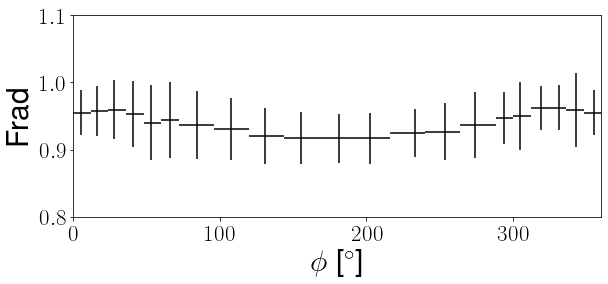

In [653]:
plt.rcParams["figure.figsize"] = (9, 4.5)
plt.errorbar(np.degrees(phiarray502), Frad, xerr = [np.degrees(phiarray502) - np.array(phibin_i), np.array(phibin_f) - np.degrees(phiarray502) ],yerr = ((1-fsInb1)/fsInb1*truebinvol.dvcsSimInb50nA_sPeak1 + (1-fpInb1)/fpInb1*truebinvol.dvcsSimInb50nA_pPeak1)/(truebinvol.dvcsSimInb50nA_non1 +(1)/fsInb1*truebinvol.dvcsSimInb50nA_sPeak1 + (1)/fpInb1*truebinvol.dvcsSimInb50nA_pPeak1)/2, color = 'k', linestyle = '')
plt.xlabel(r"$\phi$" +" ["+degree+"]")
plt.ylabel("Frad")
plt.xlim([0, 360])
plt.ylim([0.8, 1.1])

In [575]:
phiarray502 

[0.09041322052962876,
 0.28918547622073465,
 0.4814660850211353,
 0.7098011130099536,
 0.9299801363977592,
 1.1521503745344313,
 1.4782033089947924,
 1.8812590867093013,
 2.286472014179014,
 2.7088393506262496,
 3.1593501343707167,
 3.5265397141472397,
 4.0680381451357475,
 4.4206727060185935,
 4.783737661686157,
 5.124638400277914,
 5.314204820660995,
 5.567066461698056,
 5.7763730094843435,
 5.978464521942343,
 6.195935270494204]

In [482]:
tmean

0.47795157061349536